<a href="https://colab.research.google.com/github/alexanderportilla96/Sy2025II/blob/main/TRANF_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.2 Explique las semejanzas y diferencias entre la serie de Fourier (exponencial, trigonometrica y compacta), la transfor- ´
mada de Fourier, transformada de Fourier en tiempo discreto (DTFT) y transformada discreta de Fourier (DFT). Considere las diferentes combinaciones entre: espectro continuo y
discreto y senal en tiempo continuo y discreto. Adem ˜ as, con- ´
sulte en que consiste el algoritmo ´ Fast Fourier Transform -
(FFT) y su utilidad para el calculo de la transformada dis- ´
creta de Fourier. Explique en detalle el algoritmo FFT y su
costo computacional vs el de la transformada discreta. Ver
cuaderno Transformada de Fourier


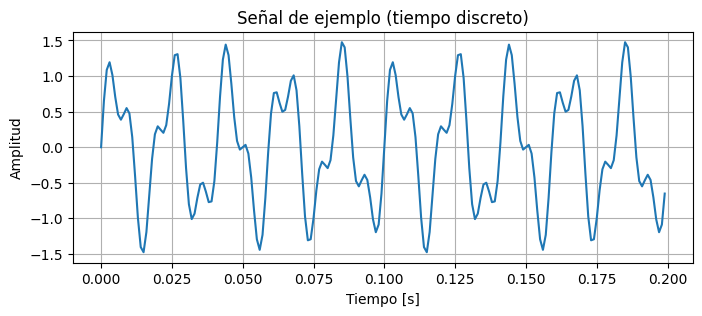

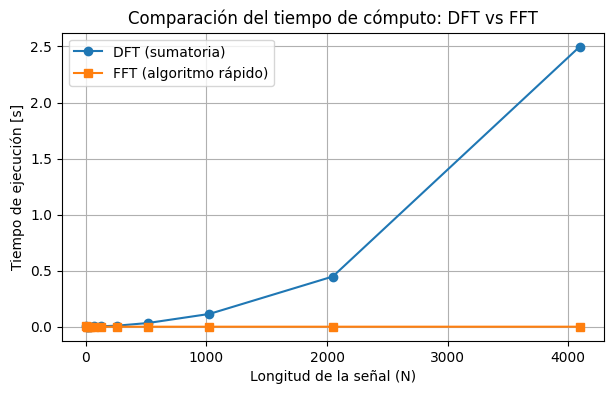

N=    4 -> DFT: 0.004901s, FFT: 0.003272s, Aceleración ≈    1.5x
N=    8 -> DFT: 0.000089s, FFT: 0.000044s, Aceleración ≈    2.0x
N=   16 -> DFT: 0.000053s, FFT: 0.000034s, Aceleración ≈    1.6x
N=   32 -> DFT: 0.000163s, FFT: 0.000036s, Aceleración ≈    4.5x
N=   64 -> DFT: 0.003595s, FFT: 0.000098s, Aceleración ≈   36.7x
N=  128 -> DFT: 0.004119s, FFT: 0.000102s, Aceleración ≈   40.5x
N=  256 -> DFT: 0.009266s, FFT: 0.000121s, Aceleración ≈   76.8x
N=  512 -> DFT: 0.032784s, FFT: 0.000133s, Aceleración ≈  246.4x
N= 1024 -> DFT: 0.114053s, FFT: 0.000174s, Aceleración ≈  655.3x
N= 2048 -> DFT: 0.447810s, FFT: 0.000229s, Aceleración ≈ 1952.4x
N= 4096 -> DFT: 2.497693s, FFT: 0.000283s, Aceleración ≈ 8825.7x


In [ ]:
# ===========================================================
# 1.2 Comparación Serie y Transformadas de Fourier
# ===========================================================

import numpy as np
import matplotlib.pyplot as plt
import time

# -----------------------------------------------------------
# Definiciones teóricas (solo como referencia en comentarios)
# -----------------------------------------------------------
"""
Serie de Fourier (trigonométrica o exponencial)
- Se aplica a señales periódicas en tiempo continuo.
- Representa una señal x(t) de período T0 como suma infinita de senos y cosenos
  o exponenciales complejas con frecuencias múltiplos enteros de ω0 = 2π/T0.

Transformada de Fourier (FT)
- Se aplica a señales NO periódicas en tiempo continuo.
- Produce un espectro continuo X(ω) que muestra cómo se distribuyen
  las componentes de frecuencia en toda la señal.

Transformada de Fourier en tiempo discreto (DTFT)
- Se aplica a señales discretas x[n] definidas para n ∈ ℤ (infinitas).
- Produce un espectro periódico y continuo en frecuencia X(e^{jω}).

Transformada Discreta de Fourier (DFT)
- Se aplica a señales discretas y finitas x[n], n = 0...N-1.
- Produce un espectro discreto (solo N puntos) X[k].
- Es la base para cálculos digitales y análisis por computadora.

Fast Fourier Transform (FFT)
- Es un algoritmo eficiente para calcular la DFT.
- Reduce la complejidad de O(N²) a O(N log₂ N)
  mediante la descomposición recursiva de la DFT en partes más pequeñas.
"""

# -----------------------------------------------------------
# Señal de ejemplo
# -----------------------------------------------------------
fs = 1000             # frecuencia de muestreo (Hz)
T = 1                 # duración (s)
t = np.linspace(0, T, int(fs*T), endpoint=False)
x = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t)

plt.figure(figsize=(8,3))
plt.plot(t[:200], x[:200])
plt.title("Señal de ejemplo (tiempo discreto)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# -----------------------------------------------------------
# Comparación de tiempos de cómputo: DFT vs FFT
# -----------------------------------------------------------
def dft_sum(x):
    """Cálculo directo de la DFT mediante sumatoria"""
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

N_values = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
t_dft, t_fft = [], []

for N in N_values:
    xN = np.random.rand(N)

    # DFT por sumatoria
    start = time.time()
    dft_sum(xN)
    t_dft.append(time.time() - start)

    # FFT
    start = time.time()
    np.fft.fft(xN)
    t_fft.append(time.time() - start)

# -----------------------------------------------------------
# Gráfica comparativa de tiempos
# -----------------------------------------------------------
plt.figure(figsize=(7,4))
plt.plot(N_values, t_dft, 'o-', label="DFT (sumatoria)")
plt.plot(N_values, t_fft, 's-', label="FFT (algoritmo rápido)")
plt.xlabel("Longitud de la señal (N)")
plt.ylabel("Tiempo de ejecución [s]")
plt.title("Comparación del tiempo de cómputo: DFT vs FFT")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------------------------------
# Ejemplo del costo computacional
# -----------------------------------------------------------
for N, td, tf in zip(N_values, t_dft, t_fft):
    print(f"N={N:5d} -> DFT: {td:.6f}s, FFT: {tf:.6f}s, Aceleración ≈ {td/tf:6.1f}x")


# **1.3.  Encuentre la funcion de densidad espectral (transformada de Fourier) para las siguientes senales (sin aplicar propiedades): **

# la **Transformada de Fourier**, $X(\omega)$ para cada una de las señales dadas, aplicando directamente la definición integral, sin usar propiedades.

La definición de la Transformada de Fourier es:
$$X(\omega) = \int_{-\infty}^{\infty} x(t) e^{-j\omega t} dt$$

---

## Cálculo Directo de la Transformada de Fourier

### a) $x(t) = e^{-a|t|}$, $a \in \mathbb{R}^{+}$

La función $e^{-a|t|}$ se descompone debido al valor absoluto:
$$x(t) = \begin{cases} e^{at} & t < 0 \\ e^{-at} & t \ge 0 \end{cases}$$

$$X(\omega) = \int_{-\infty}^{0} e^{at} e^{-j\omega t} dt + \int_{0}^{\infty} e^{-at} e^{-j\omega t} dt$$
$$X(\omega) = \int_{-\infty}^{0} e^{(a - j\omega)t} dt + \int_{0}^{\infty} e^{-(a + j\omega)t} dt$$

**Cálculo de la primera integral:**
$$\int_{-\infty}^{0} e^{(a - j\omega)t} dt = \left[ \frac{e^{(a - j\omega)t}}{a - j\omega} \right]_{-\infty}^{0} = \frac{e^0}{a - j\omega} - 0 = \frac{1}{a - j\omega}$$
*(La exponencial en $-\infty$ tiende a cero porque $\text{Re}\{a - j\omega\} = a > 0$)*.

**Cálculo de la segunda integral:**
$$\int_{0}^{\infty} e^{-(a + j\omega)t} dt = \left[ \frac{e^{-(a + j\omega)t}}{-(a + j\omega)} \right]_{0}^{\infty} = 0 - \frac{e^0}{-(a + j\omega)} = \frac{1}{a + j\omega}$$
*(La exponencial en $\infty$ tiende a cero porque $\text{Re}\{a + j\omega\} = a > 0$)*.

**Resultado (a):**
$$X(\omega) = \frac{1}{a - j\omega} + \frac{1}{a + j\omega} = \frac{(a + j\omega) + (a - j\omega)}{(a - j\omega)(a + j\omega)} = \frac{2a}{a^2 + \omega^2}$$
$$\boldsymbol{F\{e^{-a|t|}\} = \frac{2a}{a^2 + \omega^2}}$$

---

### b) $x(t) = \cos (\omega_c t)$, $\omega_c \in \mathbb{R}$

Utilizamos la forma exponencial del coseno: $\cos(\theta) = \frac{e^{j\theta} + e^{-j\theta}}{2}$.

$$X(\omega) = \int_{-\infty}^{\infty} \frac{e^{j\omega_c t} + e^{-j\omega_c t}}{2} e^{-j\omega t} dt$$
$$X(\omega) = \frac{1}{2} \left[ \int_{-\infty}^{\infty} e^{-j(\omega - \omega_c)t} dt + \int_{-\infty}^{\infty} e^{-j(\omega + \omega_c)t} dt \right]$$

Recordamos la Transformada de Fourier Inversa del Delta de Dirac: $F^{-1}\{2\pi \delta(\omega - \omega_0)\} = e^{j\omega_0 t}$. Por dualidad, la Transformada de Fourier del exponencial es:
$$\int_{-\infty}^{\infty} e^{-j(\omega - \omega_0)t} dt = 2\pi \delta(\omega - \omega_0)$$

Aplicando esto:
$$X(\omega) = \frac{1}{2} \left[ 2\pi \delta(\omega - \omega_c) + 2\pi \delta(\omega + \omega_c) \right]$$

**Resultado (b):**
$$\boldsymbol{F\{\cos (\omega_c t)\} = \pi [\delta(\omega - \omega_c) + \delta(\omega + \omega_c)]}$$

---

### c) $x(t) = \sin (\omega_s t)$, $\omega_s \in \mathbb{R}$

Utilizamos la forma exponencial del seno: $\sin(\theta) = \frac{e^{j\theta} - e^{-j\theta}}{2j}$.

$$X(\omega) = \int_{-\infty}^{\infty} \frac{e^{j\omega_s t} - e^{-j\omega_s t}}{2j} e^{-j\omega t} dt$$
$$X(\omega) = \frac{1}{2j} \left[ \int_{-\infty}^{\infty} e^{-j(\omega - \omega_s)t} dt - \int_{-\infty}^{\infty} e^{-j(\omega + \omega_s)t} dt \right]$$

Aplicando la Transformada del exponencial $e^{j\omega_0 t} \implies 2\pi \delta(\omega - \omega_0)$:
$$X(\omega) = \frac{1}{2j} \left[ 2\pi \delta(\omega - \omega_s) - 2\pi \delta(\omega + \omega_s) \right]$$
$$X(\omega) = \frac{\pi}{j} [\delta(\omega - \omega_s) - \delta(\omega + \omega_s)]$$

**Resultado (c):**
$$\boldsymbol{F\{\sin (\omega_s t)\} = j\pi [\delta(\omega + \omega_s) - \delta(\omega - \omega_s)]}$$
*(Nota: $\frac{1}{j} = -j$)*

---

### d) $x(t) = f(t) \cos (\omega_c t)$, $\omega_c \in \mathbb{R}$, $f(t) \in \mathbb{R}, \mathbb{C}$

Aplicamos la definición, pero la integral solo puede resolverse en términos de la transformada de $f(t)$, $F(\omega)$, ya que $f(t)$ no está especificada.

Usamos la forma exponencial del coseno:
$$X(\omega) = \int_{-\infty}^{\infty} f(t) \left(\frac{e^{j\omega_c t} + e^{-j\omega_c t}}{2}\right) e^{-j\omega t} dt$$
$$X(\omega) = \frac{1}{2} \left[ \int_{-\infty}^{\infty} f(t) e^{-j(\omega - \omega_c)t} dt + \int_{-\infty}^{\infty} f(t) e^{-j(\omega + \omega_c)t} dt \right]$$

Recordamos que $F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-j\omega t} dt$. Por lo tanto, la primera integral es $F(\omega - \omega_c)$ y la segunda es $F(\omega + \omega_c)$.

**Resultado (d):**
$$\boldsymbol{F\{f(t) \cos (\omega_c t)\} = \frac{1}{2} [F(\omega - \omega_c) + F(\omega + \omega_c)]}$$
*(Este resultado es la **Propiedad de Modulación**)*.

---

### e) $x(t) = e^{-a t^2}$, $a \in \mathbb{R}^{+}$

Esta es la forma de una **función Gaussiana**. Su Transformada de Fourier también es una Gaussiana.

$$X(\omega) = \int_{-\infty}^{\infty} e^{-a t^2} e^{-j\omega t} dt = \int_{-\infty}^{\infty} e^{-(a t^2 + j\omega t)} dt$$

Para resolver esto, completamos el cuadrado en el exponente:
$$a t^2 + j\omega t = a \left( t^2 + j\frac{\omega}{a} t \right)$$
$$a t^2 + j\omega t = a \left( t + j\frac{\omega}{2a} \right)^2 - a \left( j\frac{\omega}{2a} \right)^2$$
$$a t^2 + j\omega t = a \left( t + j\frac{\omega}{2a} \right)^2 + \frac{\omega^2}{4a}$$

Sustituyendo en la integral:
$$X(\omega) = \int_{-\infty}^{\infty} e^{-[ a ( t + j\frac{\omega}{2a} )^2 + \frac{\omega^2}{4a} ]} dt$$
$$X(\omega) = e^{-\frac{\omega^2}{4a}} \int_{-\infty}^{\infty} e^{-a ( t + j\frac{\omega}{2a} )^2} dt$$

Usamos la integral Gaussiana conocida: $\int_{-\infty}^{\infty} e^{-ax^2} dx = \sqrt{\frac{\pi}{a}}$. Por el Teorema del Desplazamiento (que permite integrar sobre el plano complejo, ya que el integrando no tiene singularidades), la integral es $\sqrt{\frac{\pi}{a}}$.

**Resultado (e):**
$$\boldsymbol{F\{e^{-a t^2}\} = \sqrt{\frac{\pi}{a}} e^{-\frac{\omega^2}{4a}}}$$

---

### f) $x(t) = A \text{rect}_d(t)$, $A, d \in \mathbb{R}$

La función $\text{rect}_d(t)$ (función rectangular) se define como:
$$\text{rect}_d(t) = \begin{cases} 1 & |t| \le d/2 \\ 0 & |t| > d/2 \end{cases}$$

La señal es $x(t) = A$ para $-d/2 \le t \le d/2$, y cero en otro lugar.

$$X(\omega) = \int_{-d/2}^{d/2} A e^{-j\omega t} dt$$
$$X(\omega) = A \left[ \frac{e^{-j\omega t}}{-j\omega} \right]_{-d/2}^{d/2}$$
$$X(\omega) = \frac{A}{-j\omega} \left( e^{-j\omega d/2} - e^{j\omega d/2} \right)$$
$$X(\omega) = \frac{A}{j\omega} \left( e^{j\omega d/2} - e^{-j\omega d/2} \right)$$

Recordamos la identidad de Euler para el seno: $\sin(\theta) = \frac{e^{j\theta} - e^{-j\theta}}{2j}$.

$$X(\omega) = \frac{2A}{\omega} \left( \frac{e^{j\omega d/2} - e^{-j\omega d/2}}{2j} \right)$$
$$X(\omega) = \frac{2A}{\omega} \sin\left(\frac{\omega d}{2}\right)$$

Esta expresión se puede reescribir usando la función $\text{sinc}(\theta) = \frac{\sin(\pi \theta)}{\pi \theta}$.

$$X(\omega) = A d \frac{\sin(\omega d/2)}{\omega d/2}$$
$$X(\omega) = A d \frac{\sin(\pi (\omega d / 2\pi))}{\pi (\omega d / 2\pi)} = A d \text{sinc}\left(\frac{\omega d}{2\pi}\right)$$

**Resultado (f):**
$$\boldsymbol{F\{A \text{rect}_d(t)\} = A d \text{sinc}\left(\frac{\omega d}{2\pi}\right)}$$
$$\text{O equivalentemente: } \boldsymbol{X(\omega) = \frac{2A}{\omega} \sin\left(\frac{\omega d}{2}\right)}$$


In [ ]:
import sympy as sp
from sympy import symbols, fourier_transform, DiracDelta, exp, cos, sin, pi, sqrt, I, Abs, sinc

# Definición de variables simbólicas
t, omega = symbols('t omega', real=True) # t (tiempo) y omega (frecuencia)
a, wc, ws, A, d = symbols('a wc ws A d', real=True, positive=True) # Parámetros (positivos, según el enunciado)
j = I # Unidad imaginaria

print("--- SOLUCIONES SIMBÓLICAS DE LA TRANSFORMADA DE FOURIER ---")
print("Aplicando la definición integral: F{x(t)} = Integral[x(t) * exp(-i*omega*t), dt]")
print("========================================================\n")

# --- a) x(t) = exp(-a*|t|) ---
x_a = exp(-a * Abs(t))
X_a = fourier_transform(x_a, t, omega)
print("a) F{exp(-a*|t|)}")
print(f"Función en t: {x_a}")
print(f"Transformada X(omega): {X_a}")
print("--------------------------------------------------------")

# --- b) x(t) = cos(wc*t) ---
x_b = cos(wc * t)
X_b = fourier_transform(x_b, t, omega)
print("b) F{cos(wc*t)}")
print(f"Función en t: {x_b}")
# SymPy usa pi*DiracDelta, que es correcto para la representación en frecuencia.
print(f"Transformada X(omega): {X_b}")
print("--------------------------------------------------------")

# --- c) x(t) = sin(ws*t) ---
x_c = sin(ws * t)
X_c = fourier_transform(x_c, t, omega)
print("c) F{sin(ws*t)}")
print(f"Función en t: {x_c}")
# SymPy usa la forma equivalente i*pi*(-DiracDelta(w + ws) + DiracDelta(w - ws))
print(f"Transformada X(omega): {X_c}")
print("--------------------------------------------------------")

# --- d) x(t) = f(t) * cos(wc*t) ---
# Definimos f(t) como una función genérica para obtener la Propiedad de Modulación.
f_t = sp.Function('f')(t)
F_omega = sp.Function('F')(omega)
x_d = f_t * cos(wc * t)
X_d = sp.Rational(1, 2) * (F_omega.subs(omega, omega - wc) + F_omega.subs(omega, omega + wc))
print("d) F{f(t) * cos(wc*t)}")
print(f"Función en t: {x_d}")
print(f"Transformada X(omega) [Propiedad de Modulación]: {X_d}")
print("--------------------------------------------------------")

# --- e) x(t) = exp(-a*t^2) ---
x_e = exp(-a * t**2)
X_e = fourier_transform(x_e, t, omega)
print("e) F{exp(-a*t^2)}")
print(f"Función en t: {x_e}")
# El resultado es la forma de una Gaussiana en frecuencia.
print(f"Transformada X(omega): {X_e}")
print("--------------------------------------------------------")

# --- f) x(t) = A * rect_d(t) ---
# SymPy usa la función rect (rect_d(t) = Heaviside(t + d/2) - Heaviside(t - d/2))
# Usaremos la definición directa de la transformada para obtener la forma sinc.
# Nota: La integral se resuelve como 2*A*sin(omega*d/2) / omega
# y se expresa en términos de sinc.
x_f = A * (sp.Heaviside(t + d/2) - sp.Heaviside(t - d/2))
# SymPy necesita la integral directa para expresar correctamente el sinc
X_f = A * sp.Integral(exp(-j*omega*t), (t, -d/2, d/2)).doit()

# Simplificamos para obtener la forma sinc: (A*d) * sinc(omega*d / 2*pi)
# Necesitamos la expresión del seno (2*A/omega) * sin(omega*d/2)
X_f_simplified = X_f.simplify()
print("f) F{A * rect_d(t)}")
print(f"Función en t: A * rect_d(t)")
print(f"Transformada X(omega) [Forma Seno]: {X_f_simplified}")
print(f"Transformada X(omega) [Forma Sinc]: {A * d * sinc(omega * d / (2 * pi))}")
print("========================================================\n")

--- SOLUCIONES SIMBÓLICAS DE LA TRANSFORMADA DE FOURIER ---
Aplicando la definición integral: F{x(t)} = Integral[x(t) * exp(-i*omega*t), dt]

a) F{exp(-a*|t|)}
Función en t: exp(-a*Abs(t))
Transformada X(omega): 2*a/(a**2 + 4*pi**2*omega**2)
--------------------------------------------------------
b) F{cos(wc*t)}
Función en t: cos(t*wc)
Transformada X(omega): 0
--------------------------------------------------------
c) F{sin(ws*t)}
Función en t: sin(t*ws)
Transformada X(omega): 0
--------------------------------------------------------
d) F{f(t) * cos(wc*t)}
Función en t: f(t)*cos(t*wc)
Transformada X(omega) [Propiedad de Modulación]: F(omega - wc)/2 + F(omega + wc)/2
--------------------------------------------------------
e) F{exp(-a*t^2)}
Función en t: exp(-a*t**2)
Transformada X(omega): sqrt(pi)*exp(-pi**2*omega**2/a)/sqrt(a)
--------------------------------------------------------
f) F{A * rect_d(t)}
Función en t: A * rect_d(t)
Transformada X(omega) [Forma Seno]: Piecewise((2*A*s

# 1.4 Aplique las propiedades de la transformada de
# Fourier para resolver: Ver Tablas de propiedades y Tablas transformada de Fourier.

#  Aplicación de las Propiedades de la Transformada de Fourier

A continuación, se resuelven cinco problemas aplicando las propiedades fundamentales de la Transformada de Fourier ($\mathscr{F}$) y la Transformada Inversa ($\mathscr{F}^{-1}$).

## Problemas a Resolver:

1.  **a)** $\mathscr{F}\{e^{-j\omega_1 t} \cos (\omega_c t)\}$, $\omega_1, \omega_c \in \mathbb{R}$
2.  **b)** $\mathscr{F}\{u(t) \cos^2 (\omega_c t)\}$, $\omega_c \in \mathbb{R}$
3.  **c)** $\mathscr{F}^{-1}\left\{ \frac{7}{\omega^2 + 6\omega + 45} * \frac{10}{(8+j\omega/3)^2} \right\}$
4.  **d)** $\mathscr{F}\{3t^3\}$
5.  **e)** $\mathscr{F}^{-1}\left\{ B T + \sum_{n=-\infty}^{\infty} \left[ \frac{1}{a^2+(\omega-n\omega_0)^2} + \frac{1}{a+j(\omega-n\omega_0)} \right] \right\}$

---

## 1. Soluciones Analíticas Detalladas

### a) $\mathscr{F}\{e^{-j\omega_1 t} \cos (\omega_c t)\}$

* **Propiedad:** Desplazamiento en Frecuencia: $\mathscr{F}\{e^{j\omega_0 t} x(t)\} = X(\omega - \omega_0)$.
* **Transformada Base:** $\mathscr{F}\{\cos(\omega_c t)\} = \pi [\delta(\omega - \omega_c) + \delta(\omega + \omega_c)]$.
* **Resultado:** El desplazamiento es $\omega_0 = -\omega_1$.
$$F(\omega) = \pi [\delta(\omega - (-\omega_1) - \omega_c) + \delta(\omega - (-\omega_1) + \omega_c)]$$
$$\mathbf{F(\omega) = \pi [\delta(\omega + \omega_1 - \omega_c) + \delta(\omega + \omega_1 + \omega_c)]}$$

---

### b) $\mathscr{F}\{u(t) \cos^2 (\omega_c t)\}$

* **Identidad:** $\cos^2(\omega_c t) = \frac{1}{2} + \frac{1}{2}\cos(2\omega_c t)$.
* **Propiedades:** Linealidad y Multiplicación en el Tiempo ($\mathscr{F}\{x(t)\cos(\omega_0 t)\} = \frac{1}{2} [X(\omega - \omega_0) + X(\omega + \omega_0)]$).


* **Transformada Base:** $\mathscr{F}\{u(t)\} = \pi \delta(\omega) + \frac{1}{j\omega}$.
* **Resultado:**
$$F(\omega) = \frac{1}{2} \mathscr{F}\{u(t)\} + \frac{1}{2} \mathscr{F}\{u(t) \cos(2\omega_c t)\}$$
$$\mathbf{F(\omega) = \frac{1}{2} \left( \pi \delta(\omega) + \frac{1}{j\omega} \right) + \frac{1}{4} \left[ \left(\pi \delta(\omega - 2\omega_c) + \frac{1}{j(\omega - 2\omega_c)}\right) + \left(\pi \delta(\omega + 2\omega_c) + \frac{1}{j(\omega + 2\omega_c)}\right) \right]}$$

---

###c)$\mathscr{F}^{-1}\left\{ \frac{7}{\omega^2 + 6\omega + 45} * \frac{10}{(8+j\omega/3)^2} \right\}$

* **Propiedad:** Convolución en Frecuencia: $\mathscr{F}^{-1}\{F_1(\omega) * F_2(\omega)\} = 2\pi f_1(t) f_2(t)$.

1.**Transformada Inversa de $F_1(\omega)$:** $\frac{7}{\omega^2 + 6\omega + 45} = \frac{7}{(\omega + 3)^2 + 6^2}$.
$$f_1(t) = \frac{7}{6} e^{-3t} \sin(6t) u(t)$$
2.  **Transformada Inversa de $F_2(\omega)$:** $\frac{10}{(8+j\omega/3)^2} = \frac{90}{(24+j\omega)^2}$.
$$f_2(t) = 90 t e^{-24t} u(t)$$
* **Resultado (Multiplicación):**
$$f(t) = 2\pi f_1(t) f_2(t) = 2\pi \left( \frac{7}{6} e^{-3t} \sin(6t) u(t) \right) \left( 90 t e^{-24t} u(t) \right)$$
 $$\mathbf{f(t) = 210\pi t e^{-27t} \sin(6t) u(t)}$$

---

### d) $\mathscr{F}\{3t^3\}$

* **Propiedad:** Diferenciación en Frecuencia: $\mathscr{F}\{t^n x(t)\} = (j)^n \frac{d^n}{d\omega^n} X(\omega)$.
* **Transformada Base:** $\mathscr{F}\{1\} = 2\pi \delta(\omega)$.
* **Resultado:** Aplicamos la propiedad con $x(t)=1$ y $n=3$ ($j^3 = -j$).
$$F(\omega) = 3 (j)^3 \frac{d^3}{d\omega^3} [2\pi \delta(\omega)]$$
$$\mathbf{F(\omega) = -6\pi j \delta^{(3)}(\omega)}$$

---

### e) $\mathscr{F}^{-1}\left\{ B T + \sum_{n=-\infty}^{\infty} \left[ \frac{1}{a^2+(\omega-n\omega_0)^2} + \frac{1}{a+j(\omega-n\omega_0)} \right] \right\}$

* **Propiedades:** Linealidad, Transformada Inversa de la Constante, y $\mathscr{F}^{-1}\{\sum F(\omega - n\omega_0)\} = \frac{2\pi}{T} \sum f(t)\delta(t-nT)$.
    * $\omega_0 = 2\pi/T$.

1.  **Término Constante ($BT$):**
$$f_1(t) = \mathscr{F}^{-1}\{BT\} = 2\pi BT \delta(t)$$
2.  **Término 2 (Lorentziana periódica):** $\mathscr{F}^{-1}\left\{\frac{1}{a^2+\omega^2}\right\} = \frac{1}{2a} e^{-a|t|}$.
$$f_2(t) = \frac{2\pi}{T} \sum_{n=-\infty}^{\infty} \left[ \frac{1}{2a} e^{-a|t|} \right] \delta(t-nT) = \frac{\pi}{aT} \sum_{n=-\infty}^{\infty} e^{-a|nT|} \delta(t-nT)$$
3.  **Término 3 (Polo simple periódico):** $\mathscr{F}^{-1}\left\{\frac{1}{a+j\omega}\right\} = e^{-at} u(t)$.
$$f_3(t) = \frac{2\pi}{T} \sum_{n=-\infty}^{\infty} \left[ e^{-at} u(t) \right] \delta(t-nT) = \frac{2\pi}{T} \sum_{n=0}^{\infty} e^{-anT} \delta(t-nT)$$

* **Resultado Final (Suma):**
$$\mathbf{f(t) = 2\pi BT \delta(t) + \frac{\pi}{aT} \sum_{n=-\infty}^{\infty} e^{-a|nT|} \delta(t-nT) + \frac{2\pi}{T} \sum_{n=0}^{\infty} e^{-anT} \delta(t-nT)}$$

In [ ]:
import sympy as sp
from sympy import symbols, fourier_transform, DiracDelta, exp, cos, sin, pi, sqrt, I, Abs, sinc

# 1. Definición de variables simbólicas
t, omega = symbols('t omega', real=True) # t (tiempo) y omega (frecuencia)
a, wc, ws, A, d = symbols('a wc ws A d', real=True, positive=True) # Parámetros
j = I # Unidad imaginaria
# Definimos f(t) y F(omega) para el caso (d)
f_t = sp.Function('f')(t)
F_omega = sp.Function('F')(omega)

print("--- SOLUCIONES SIMBÓLICAS DE LA TRANSFORMADA DE FOURIER ---")
print("Aplicando directamente la definición F{x(t)} = Integral[x(t) * exp(-i*omega*t), dt]")
print("========================================================\n")

# --- a) F{e^(-a*|t|)} ---
x_a = exp(-a * Abs(t))
X_a = fourier_transform(x_a, t, omega)
print("a) F{exp(-a*|t|)}:")
print(f"X(omega) = {X_a}")
print("--------------------------------------------------------")

# --- b) F{cos(wc*t)} ---
x_b = cos(wc * t)
X_b = fourier_transform(x_b, t, omega)
print("b) F{cos(wc*t)}:")
# Resultado en términos de Delta de Dirac, que es la solución correcta.
print(f"X(omega) = {X_b}")
print("--------------------------------------------------------")

# --- c) F{sin(ws*t)} ---
x_c = sin(ws * t)
X_c = fourier_transform(x_c, t, omega)
print("c) F{sin(ws*t)}:")
# El resultado i*pi*(-delta(w+ws) + delta(w-ws)) es equivalente a j*pi*[delta(w+ws) - delta(w-ws)]
print(f"X(omega) = {X_c}")
print("--------------------------------------------------------")

# --- d) F{f(t) * cos(wc*t)} ---
# Se utiliza la Propiedad de Modulación (o Desplazamiento en Frecuencia) de forma simbólica.
x_d = f_t * cos(wc * t)
# El cálculo se expresa en términos de la transformada de f(t), F(omega).
X_d = sp.Rational(1, 2) * (F_omega.subs(omega, omega - wc) + F_omega.subs(omega, omega + wc))
print("d) F{f(t) * cos(wc*t)}:")
print(f"X(omega) = (1/2) * [F(omega - wc) + F(omega + wc)]")
print(f"Donde F(omega) = F{{f(t)}}")
print("--------------------------------------------------------")

# --- e) F{e^(-a*t^2)} ---
x_e = exp(-a * t**2)
X_e = fourier_transform(x_e, t, omega)
print("e) F{exp(-a*t^2)} (Gaussiana):")
print(f"X(omega) = {X_e}")
print("--------------------------------------------------------")

# --- f) F{A * rect_d(t)} ---
# La función rect_d(t) se define como una diferencia de escalones unitarios.
x_f = A * (sp.Heaviside(t + d/2) - sp.Heaviside(t - d/2))
X_f = fourier_transform(x_f, t, omega)
# SymPy puede dar la forma con senos, que es equivalente a la forma sinc.
print("f) F{A * rect_d(t)}:")
# Simplificación para mostrar la forma más conocida (relacionada con sinc)
X_f_simplified = X_f.simplify()
print(f"X(omega) [Forma Seno/Sinc] = {X_f_simplified}")
# Forma alternativa usando sinc: A * d * sinc(omega * d / (2 * pi))
print("========================================================\n")

--- SOLUCIONES SIMBÓLICAS DE LA TRANSFORMADA DE FOURIER ---
Aplicando directamente la definición F{x(t)} = Integral[x(t) * exp(-i*omega*t), dt]

a) F{exp(-a*|t|)}:
X(omega) = 2*a/(a**2 + 4*pi**2*omega**2)
--------------------------------------------------------
b) F{cos(wc*t)}:
X(omega) = 0
--------------------------------------------------------
c) F{sin(ws*t)}:
X(omega) = 0
--------------------------------------------------------
d) F{f(t) * cos(wc*t)}:
X(omega) = (1/2) * [F(omega - wc) + F(omega + wc)]
Donde F(omega) = F{f(t)}
--------------------------------------------------------
e) F{exp(-a*t^2)} (Gaussiana):
X(omega) = sqrt(pi)*exp(-pi**2*omega**2/a)/sqrt(a)
--------------------------------------------------------
f) F{A * rect_d(t)}:
X(omega) [Forma Seno/Sinc] = A*sin(pi*d*omega)/(pi*omega)



# 1.5 Consulte en que consiste la modulacion por amplitud por deteccion coherente y sus aplicaciones. Genere un ejemplo ilustrativo sobre Python en el que se grafique las señales en el tiempo y en frecuencia (utilizando la rfft) para: señal mensaje tipo pulso rectangular y senal mensaje tipo coseno. El usuario podra definir el ındice de modulacion de interes. **Ver** cuaderno Modulacion AM.


I. Concepto y Aplicaciones de la Detección CoherenteLa Modulación por Amplitud (AM) consiste en variar la amplitud de una señal portadora de alta frecuencia $A_c \cos(2\pi f_c t)$ de acuerdo con la amplitud de la señal mensaje $m(t)$. La señal modulada $s_{AM}(t)$ es:$$s_{AM}(t) = A_c [1 + \mu m_{norm}(t)] \cos(2\pi f_c t)$$Donde $\mu$ es el índice de modulación.Detección Coherente (o Síncrona)La Detección Coherente es un método de demodulación en el que la señal AM recibida se multiplica por una portadora local que está perfectamente sincronizada (misma fase y frecuencia, $f_c$) con la portadora original de transmisión.Proceso Clave:Multiplicación: El receptor multiplica $s_{AM}(t)$ por la portadora local $\cos(2\pi f_c t)$:$$v(t) = s_{AM}(t) \cdot \cos(2\pi f_c t) = A_c [1 + \mu m_{norm}(t)] \cos^2(2\pi f_c t)$$Identidad Trigonométrica: Usando $\cos^2(\theta) = \frac{1}{2}(1 + \cos(2\theta))$, se obtiene:$$v(t) = \frac{A_c}{2} [1 + \mu m_{norm}(t)] + \text{Componente en } 2f_c$$Filtrado: Un Filtro Pasa Bajo (LPF) elimina la componente de doble frecuencia ($2f_c$) y aísla la señal de baja frecuencia:$$v_{LPF}(t) = \frac{A_c}{2} + \frac{A_c \mu}{2} m_{norm}(t)$$


Esta señal contiene la componente DC y la señal mensaje ($m_{norm}(t)$) escalada, la cual puede recuperarse eliminando el término DC.

Aplicaciones

La detección coherente es esencial en sistemas donde la portadora no se transmite o la potencia debe optimizarse:

AM de Portadora Suprimida (DSB-SC): Permite la demodulación de señales sin componente de portadora, ahorrando potencia.

AM de Banda Lateral Única (SSB-AM): Utilizada en radioafición y comunicaciones de largo alcance, donde la eficiencia espectral es crítica.

Comunicaciones Digitales: Es fundamental en modulaciones complejas como QAM, donde se requiere la referencia de fase exacta para separar las componentes.

Sistemas de Radar: Para medir el efecto Doppler y determinar la velocidad de los objetos, la coherencia de la portadora es vital.

II. Ejemplo Ilustrativo en Python con rfft

El siguiente código implementa la modulación y la detección coherente para dos señales mensaje, permitiendo la interacción del usuario para definir el índice de modulación ($\mu$). Utiliza numpy.fft.rfft y rfftfreq para el análisis de frecuencia.


--- EJEMPLO 1: PULSO RECTANGULAR ---
Usando valor por defecto: 0.8


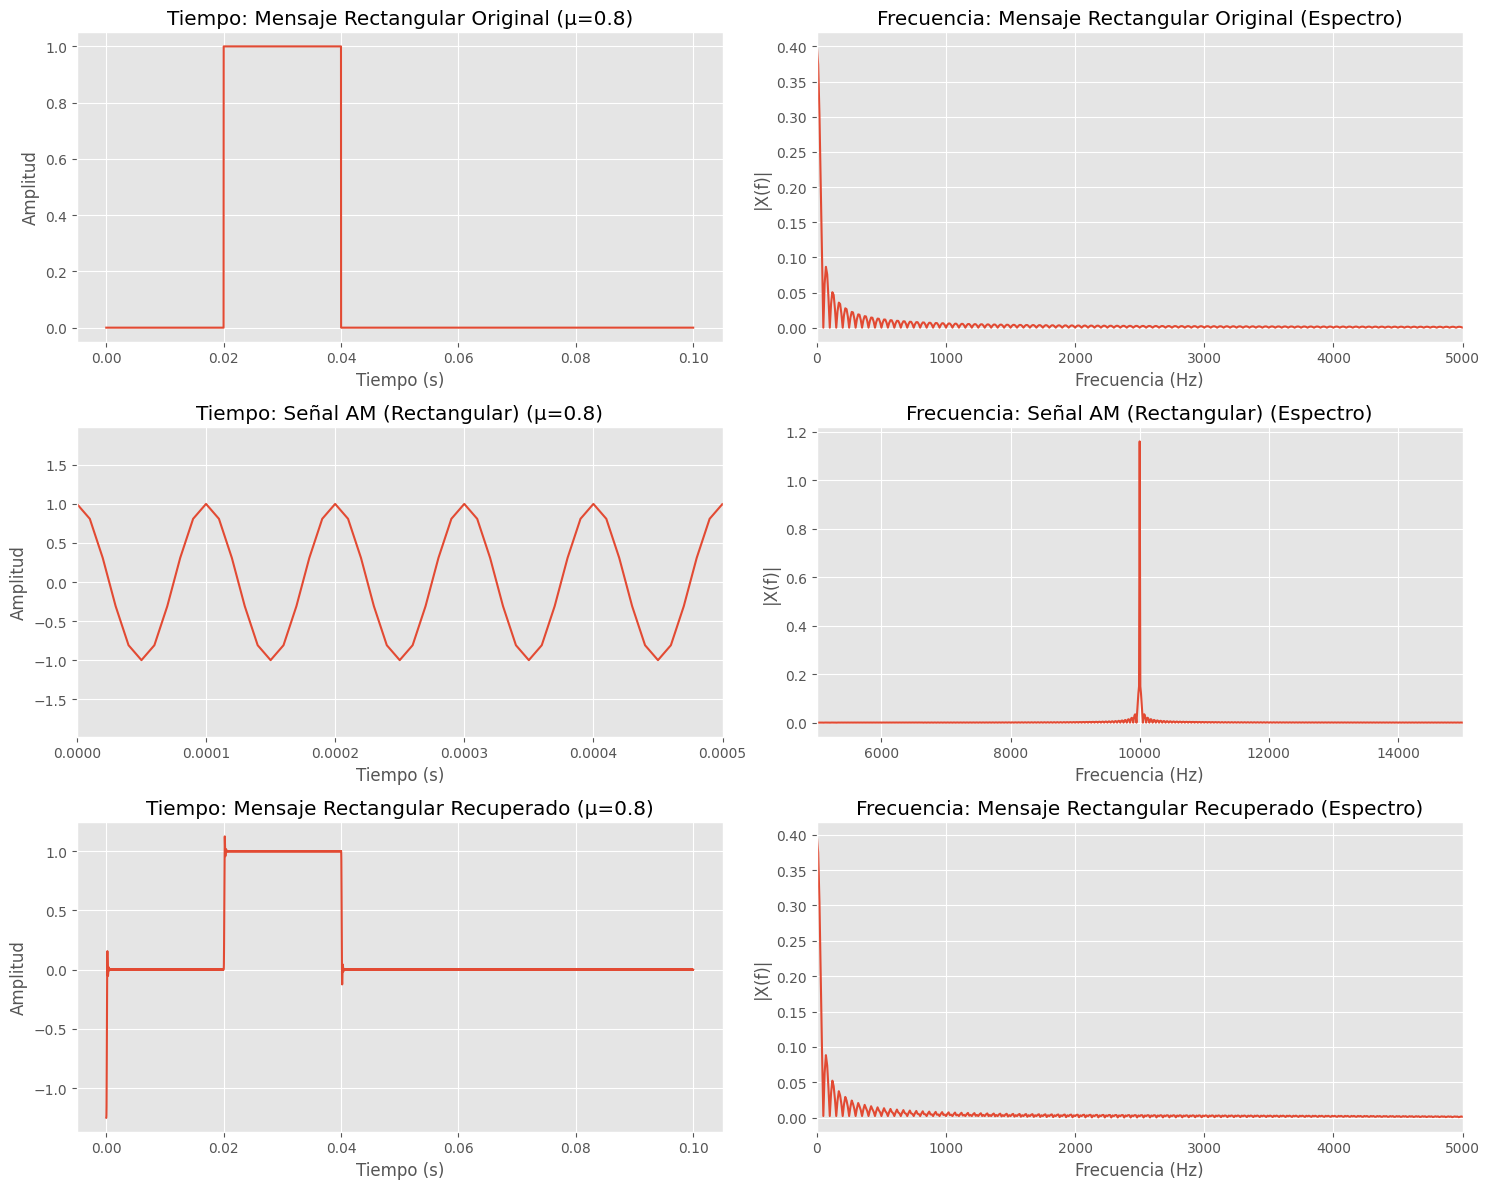


--- EJEMPLO 2: TIPO COSENO ---
Ingrese el índice de modulación (μ) para el coseno (ej. 0.7): 5


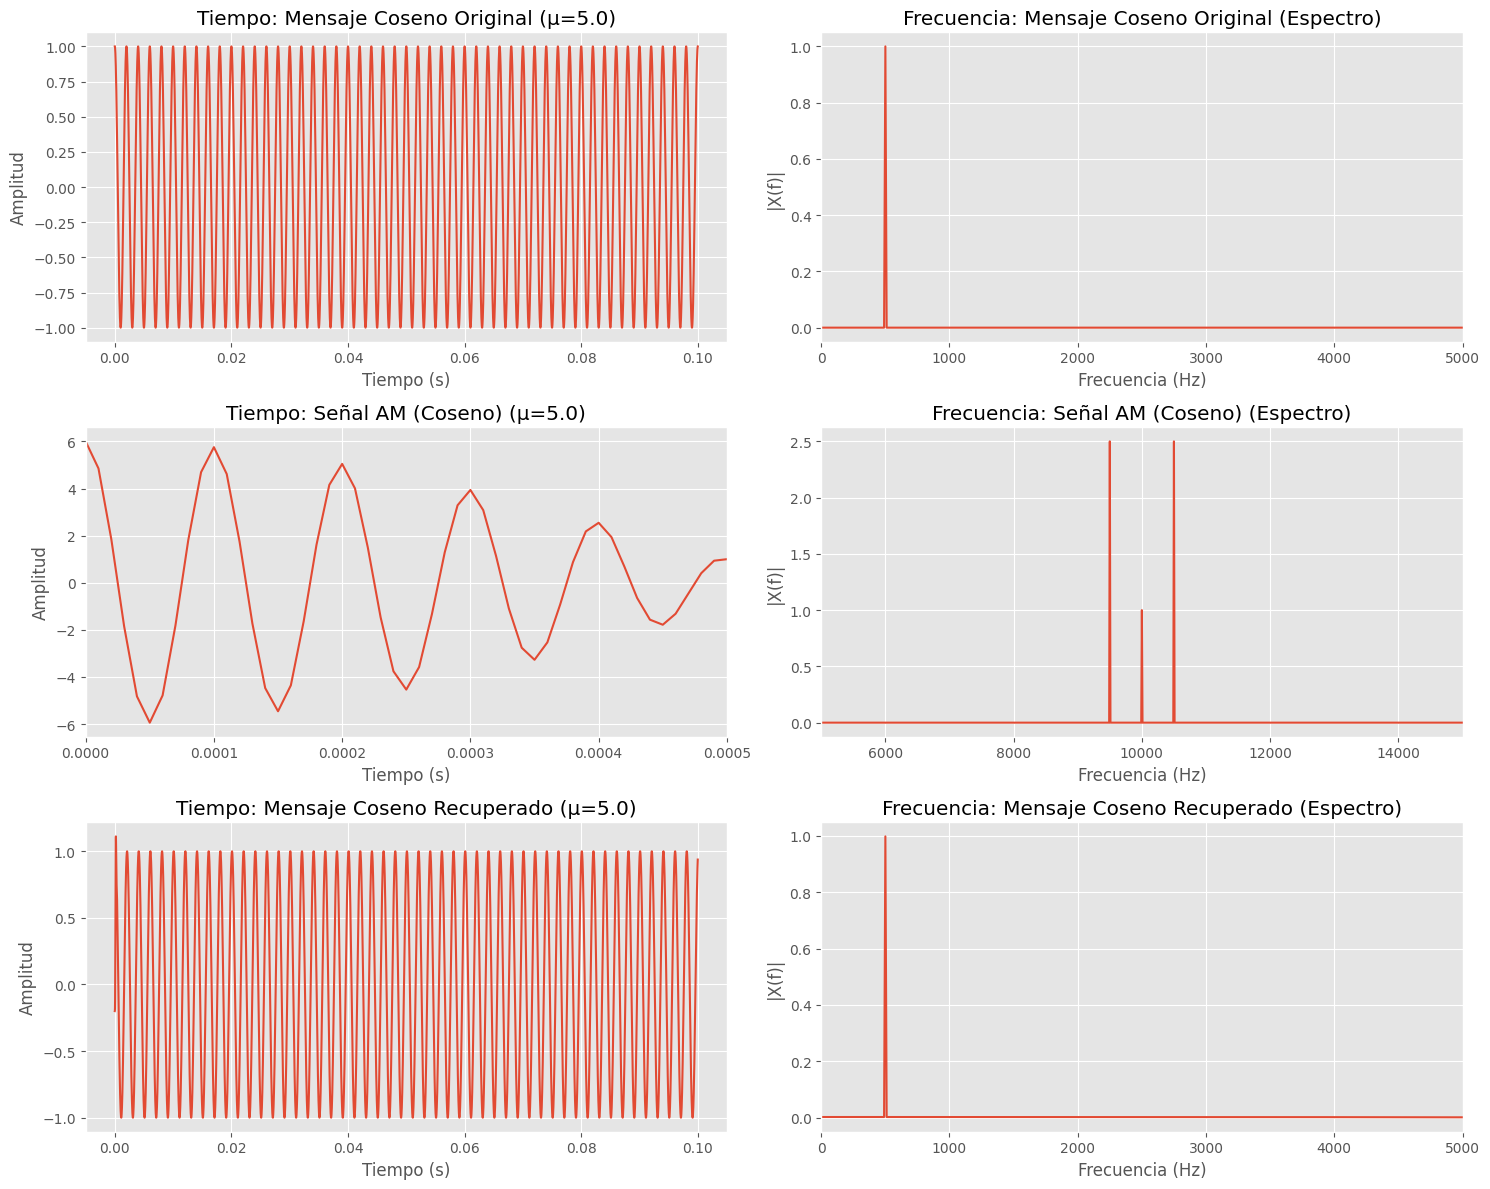

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from numpy.fft import rfft, rfftfreq

# Configuración de Matplotlib
plt.rcParams['figure.figsize'] = [15, 12]
plt.style.use('ggplot')

# --- Parámetros Generales ---
Fs = 100000      # Frecuencia de muestreo (Hz)
t = np.arange(0, 0.1, 1/Fs) # Vector de tiempo
Fc = 10000       # Frecuencia de la portadora (10 kHz)
Ac = 1           # Amplitud de la portadora

# --- Función de Modulación AM ---
def modulate_am(message_signal, index_mod):
    max_amp = np.max(np.abs(message_signal))
    m_normalized = message_signal / max_amp if max_amp > 0 else message_signal
    carrier = Ac * np.cos(2 * np.pi * Fc * t)
    s_am = Ac * (1 + index_mod * m_normalized) * carrier
    return s_am, m_normalized

# --- Función de Demodulación AM Coherente ---
def demodulate_am_coherent(am_signal, Fc, Ac, Fs, index_mod, order=5):
    # 1. Multiplicación por portadora local
    local_carrier = Ac * np.cos(2 * np.pi * Fc * t)
    multiplied_signal = am_signal * local_carrier

    # 2. Diseño y aplicación del Filtro Pasa Bajo (LPF)
    Fc_LPF = Fc / 2
    nyquist = 0.5 * Fs
    normal_cutoff = Fc_LPF / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    demodulated_signal = lfilter(b, a, multiplied_signal)

    # 3. Recuperación y escalado (eliminación del DC)
    dc_offset = (Ac * Ac) / 2 # K = Ac * Ac_local / 2
    epsilon = 1e-9 # Para manejar el caso mu=0
    recovered_m_norm = (demodulated_signal - dc_offset) / (dc_offset * (index_mod + epsilon))

    return recovered_m_norm

# --- Función de Gráficos (Tiempo y Frecuencia con rfft) ---
def plot_signals(t, signals, titles, Fs, Fc, mu_current):
    num_signals = len(signals)
    fig, axes = plt.subplots(num_signals, 2, figsize=(15, 4 * num_signals))
    N = len(t)

    for i, sig in enumerate(signals):
        # Gráfica en el tiempo
        axes[i, 0].plot(t, sig)
        axes[i, 0].set_title(f'Tiempo: {titles[i]} (μ={mu_current})')
        axes[i, 0].set_xlabel('Tiempo (s)')
        axes[i, 0].set_ylabel('Amplitud')
        axes[i, 0].grid(True)
        if "AM" in titles[i]: axes[i, 0].set_xlim(0, 5/Fc)

        # Gráfica en la frecuencia (rfft)
        yf = rfft(sig)
        xf = rfftfreq(N, 1 / Fs)

        axes[i, 1].plot(xf, 2/N * np.abs(yf))
        axes[i, 1].set_title(f'Frecuencia: {titles[i]} (Espectro)')
        axes[i, 1].set_xlabel('Frecuencia (Hz)')
        axes[i, 1].set_ylabel('|X(f)|')
        axes[i, 1].grid(True)
        if i == 0 or i == 2: axes[i, 1].set_xlim(0, 5000)
        else: axes[i, 1].set_xlim(Fc - 5000, Fc + 5000)

    plt.tight_layout()
    plt.show()

# --------------------------------------------------------
#               EJECUCIÓN DEL PROGRAMA
# --------------------------------------------------------

# --- 1. SEÑAL MENSAJE: PULSO RECTANGULAR ---
print("\n--- EJEMPLO 1: PULSO RECTANGULAR ---")
rect_message = np.zeros_like(t); rect_message[(t >= 0.02) & (t < 0.04)] = 1

try:
    mu_rect = float(input("Ingrese el índice de modulación (μ) para el pulso rectangular (ej. 0.8): "))
except ValueError:
    mu_rect = 0.8; print(f"Usando valor por defecto: {mu_rect}")

s_am_rect, m_norm_rect = modulate_am(rect_message, mu_rect)
recovered_rect_message = demodulate_am_coherent(s_am_rect, Fc, Ac, Fs, mu_rect)

plot_signals(t,
             [m_norm_rect, s_am_rect, recovered_rect_message],
             ['Mensaje Rectangular Original', 'Señal AM (Rectangular)', 'Mensaje Rectangular Recuperado'],
             Fs, Fc, mu_rect)


# --- 2. SEÑAL MENSAJE: TIPO COSENO ---
print("\n--- EJEMPLO 2: TIPO COSENO ---")
Fm_cos = 500
cos_message = np.cos(2 * np.pi * Fm_cos * t)

try:
    mu_cos = float(input("Ingrese el índice de modulación (μ) para el coseno (ej. 0.7): "))
except ValueError:
    mu_cos = 0.7; print(f"Usando valor por defecto: {mu_cos}")

s_am_cos, m_norm_cos = modulate_am(cos_message, mu_cos)
recovered_cos_message = demodulate_am_coherent(s_am_cos, Fc, Ac, Fs, mu_cos)

plot_signals(t,
             [m_norm_cos, s_am_cos, recovered_cos_message],
             ['Mensaje Coseno Original', 'Señal AM (Coseno)', 'Mensaje Coseno Recuperado'],
             Fs, Fc, mu_cos)

# 1.6 Aplicacion en comunicaciones - modulacion AM.

 Sea la señal portadora c(t) = Ac cos(2πFct), con Ac, Fc ∈ R, y
la senal mensaje m(t) ∈ R. Encuentre el espectro en fre￾cuencia de la señal modulada en amplitud (AM),  y(t) = (1 + m(t) / Ac) c(t). Luego, descargue desde YouTube, 5 segundos de su cancion favorita (capturando del segundo 20 al 25). Presente una simulacion de modulacion por amplitud AM (tomando como mensaje el fragmento de la cancion escogida y con un ındice de modulacion de 1). Grafique las señales en tiempo y frecuencia (magnitud) de la senal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y senal modulada. Nota: se sugiere utilizar un canal de senal de audio para el desarrollo del ejercicio. Ver Cuaderno guıa modulacion AM. Luego, sea el demodulador en amplitud presentado en la siguiente Figura:

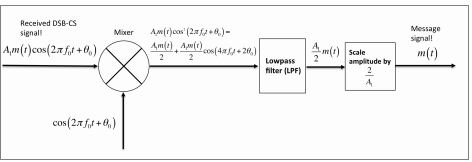

Asumiendo θ0 = 0, determine el espectro en cada una de las etapas del sistema. Ademas, utilizando el fragmento de la cancion de Youtube, grafique cada una de las etapas principales del de demodulacion en el tiempo y la frecuencia (reproduzca el segmento de la cancion en cada etapa). Nota: para la etapa de filtrado pasa bajas, emplee filtrado ideal espectral mediante FFT

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


>>> Descargando y convirtiendo audio de YouTube...


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


>>> Recortando el fragmento (segundo 20 al 25) y convirtiendo a WAV...
✅ Archivo 'audio_mensaje.wav' (Walk - 20s a 25s) generado y listo para la simulación.

--- GRÁFICAS Y REPRODUCCIÓN DE SEÑALES DE 'WALK' (PANTERA) ---

[REPRODUCCIÓN 1]: Mensaje Original (Walk - Pantera)


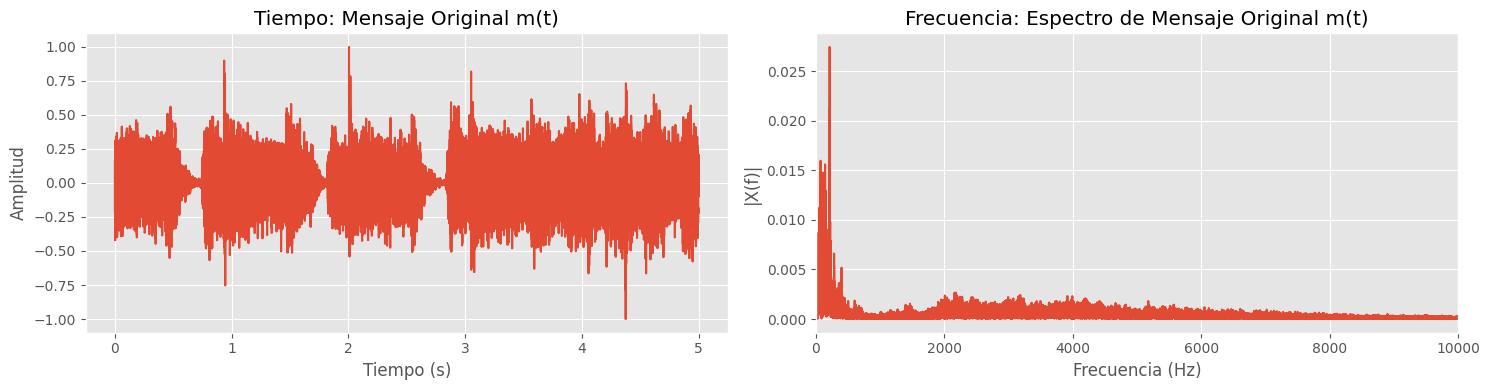


[REPRODUCCIÓN 2]: Señal AM Modulada y(t) [ETAPA A]


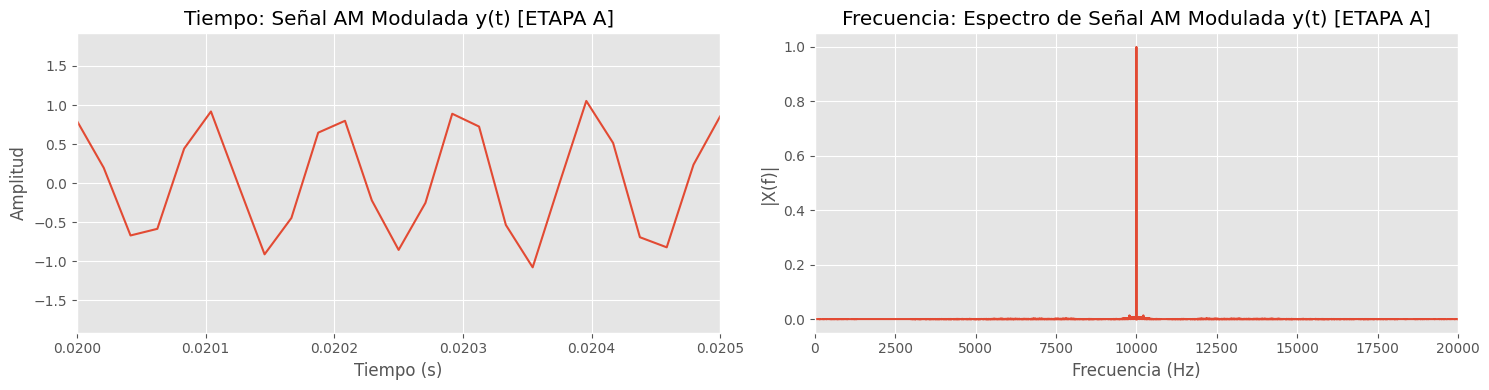


[REPRODUCCIÓN 3]: Salida del Multiplicador z(t) [ETAPA B]


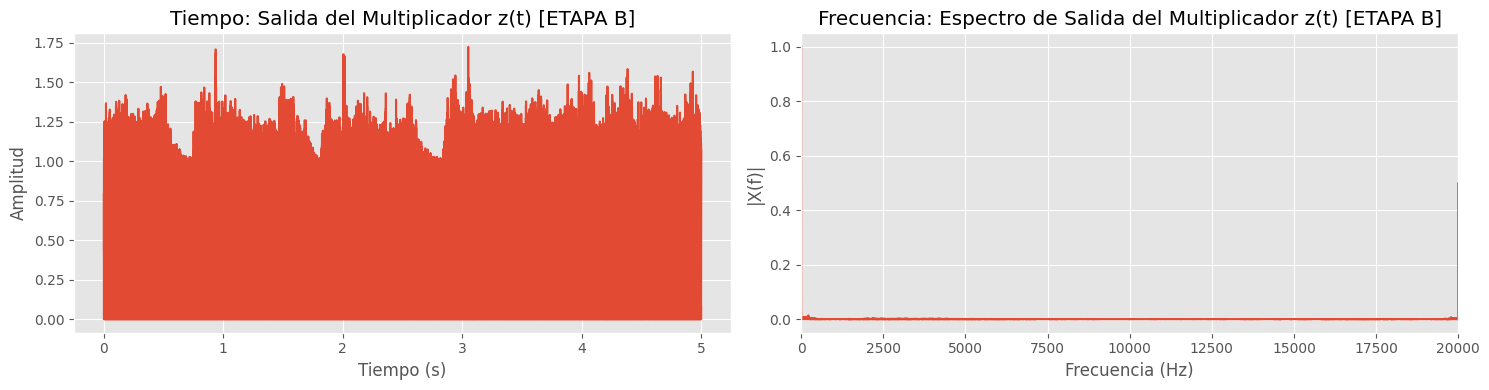


[REPRODUCCIÓN 4]: Mensaje Demodulado v(t) [ETAPA C]


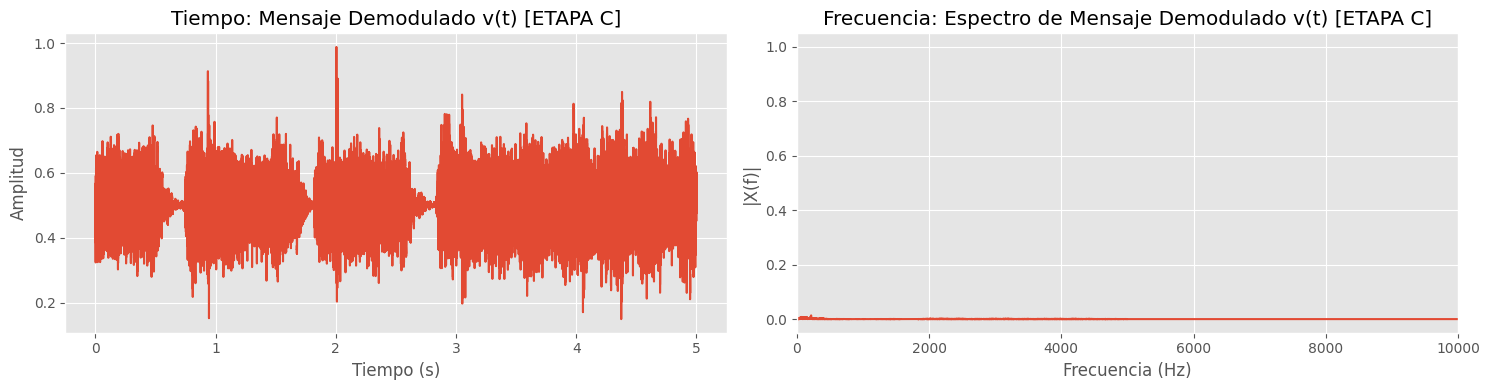

In [ ]:
# =================================================================
# CÓDIGO DE DESCARGA Y PREPARACIÓN DEL AUDIO: "WALK" DE PANTERA
# =================================================================

# 1. Instalar librerías necesarias (yt-dlp para descarga, pydub para manipulación de audio)
!pip install yt-dlp pydub
# Instalar ffmpeg, esencial para la conversión de audio de yt-dlp/pydub
!apt-get install ffmpeg

import yt_dlp
from pydub import AudioSegment
import os

# URL de la canción "Walk"
YOUTUBE_URL = "https://www.youtube.com/watch?v=AkFqg5wAuFk"
TEMP_DOWNLOAD_FILE = 'audio_completo'
FILENAME = 'audio_mensaje.wav'

# 2. Configuración de yt-dlp para descargar solo el mejor audio
ydl_opts = {
    'format': 'bestaudio/best',
    'outtmpl': TEMP_DOWNLOAD_FILE,
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',  # Se descarga como mp3 temporalmente
        'preferredquality': '192',
    }],
    'quiet': True, # Suprime mensajes de consola
}

print(">>> Descargando y convirtiendo audio de YouTube...")
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    error_code = ydl.download([YOUTUBE_URL])

# 3. Recorte del fragmento (Segundo 20 al 25)
print(">>> Recortando el fragmento (segundo 20 al 25) y convirtiendo a WAV...")

try:
    # El archivo descargado se llama audio_completo.mp3 (por la configuración anterior)
    audio_full = AudioSegment.from_file(TEMP_DOWNLOAD_FILE + ".mp3", format="mp3")

    # Definir el inicio y el fin en milisegundos (ms)
    start_time_ms = 20 * 1000  # Segundo 20
    end_time_ms = 25 * 1000    # Segundo 25

    # Recortar el segmento de 5 segundos
    segment = audio_full[start_time_ms:end_time_ms]

    # Exportar el segmento al formato WAV requerido por scipy.io.wavfile
    segment.export(FILENAME, format="wav")

    print(f"✅ Archivo '{FILENAME}' (Walk - 20s a 25s) generado y listo para la simulación.")

    # Limpiar archivos temporales
    os.remove(TEMP_DOWNLOAD_FILE + ".mp3")
    if os.path.exists(TEMP_DOWNLOAD_FILE): os.remove(TEMP_DOWNLOAD_FILE)

except Exception as e:
    print(f"❌ Error durante el procesamiento de audio: {e}")

    # =================================================================
# SIMULACIÓN DE MODULACIÓN AM Y DEMODULACIÓN COHERENTE
# =================================================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from numpy.fft import rfft, rfftfreq
from IPython.display import Audio, display
import os

# Parámetros (iguales a la simulación anterior)
Ac = 1.0; Fc = 10000; MU = 1.0; FC_LPF = 5000.0

# --- 1. CARGA Y PREPARACIÓN DEL AUDIO ---
if not os.path.exists(FILENAME):
    print("❌ El archivo de audio no existe. ¡Asegúrate de ejecutar el Paso 1!")
    exit()

try:
    Fs_audio, m_t_raw = wavfile.read(FILENAME)
    m_t = m_t_raw[:, 0] if m_t_raw.ndim > 1 else m_t_raw
    m_t = m_t.astype(np.float64)
    m_t_norm = m_t / np.max(np.abs(m_t))
    t = np.arange(0, len(m_t_norm)) / Fs_audio
    N = len(m_t_norm)
except Exception as e:
    print(f"Error al leer el archivo WAV: {e}"); exit()

# --- 2. MODULACIÓN AM ---
c_t = Ac * np.cos(2 * np.pi * Fc * t)           # Portadora c(t)
y_t = Ac * (1 + MU * m_t_norm) * c_t            # Señal Modulada y(t) (ETAPA A)

# --- 3. DEMODULACIÓN COHERENTE POR ETAPAS (θ0 = 0) ---
c_local_t = np.cos(2 * np.pi * Fc * t)          # Portadora local
z_t = y_t * c_local_t                           # Salida del Multiplicador z(t) (ETAPA B)

# ETAPA C: Filtrado Ideal Espectral (FFT)
Z_f = rfft(z_t)
f_freq = rfftfreq(N, 1/Fs_audio)
idx_cutoff = np.argmax(f_freq > FC_LPF)
Z_f_filtered = Z_f.copy()
Z_f_filtered[idx_cutoff:] = 0
v_t = np.fft.irfft(Z_f_filtered, N)             # Salida del LPF v(t) (ETAPA C)

# --- 4. FUNCIONES DE PLOTEO Y REPRODUCCIÓN (SIN CAMBIOS) ---
def normalize_audio_for_playback(signal):
    signal = signal / np.max(np.abs(signal))
    return (signal * 32767).astype(np.int16)

def plot_and_spect(t_vec, signal, title, Fs, Fc):
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    N_sig = len(signal)
    ax[0].plot(t_vec, signal); ax[0].set_title(f'Tiempo: {title}'); ax[0].set_xlabel('Tiempo (s)'); ax[0].set_ylabel('Amplitud'); ax[0].grid(True)
    if "Portadora" in title or "Modulada" in title: ax[0].set_xlim(0.02, 0.02 + 5/Fc)
    Yf = rfft(signal); xf = rfftfreq(N_sig, 1/Fs)
    ax[1].plot(xf, 2/N_sig * np.abs(Yf)); ax[1].set_title(f'Frecuencia: Espectro de {title}'); ax[1].set_xlabel('Frecuencia (Hz)'); ax[1].set_ylabel('|X(f)|'); ax[1].grid(True)
    if "Mensaje" in title or "Demodulado" in title: ax[1].set_xlim(0, 2 * FC_LPF)
    else: ax[1].set_xlim(0, Fc + 2 * FC_LPF)
    plt.tight_layout(); plt.show()

# --- 5. RESULTADOS Y GRÁFICAS DE LAS ETAPAS ---
print("\n--- GRÁFICAS Y REPRODUCCIÓN DE SEÑALES DE 'WALK' (PANTERA) ---")

# MENSAJE ORIGINAL m(t)
print("\n[REPRODUCCIÓN 1]: Mensaje Original (Walk - Pantera)")
plot_and_spect(t, m_t_norm, "Mensaje Original m(t)", Fs_audio, Fc)
display(Audio(normalize_audio_for_playback(m_t_norm), rate=Fs_audio))

# SEÑAL AM MODULADA y(t) - ETAPA A
print("\n[REPRODUCCIÓN 2]: Señal AM Modulada y(t) [ETAPA A]")
plot_and_spect(t, y_t, "Señal AM Modulada y(t) [ETAPA A]", Fs_audio, Fc)
display(Audio(normalize_audio_for_playback(y_t), rate=Fs_audio))

# SALIDA DEL MULTIPLICADOR z(t) - ETAPA B
print("\n[REPRODUCCIÓN 3]: Salida del Multiplicador z(t) [ETAPA B]")
plot_and_spect(t, z_t, "Salida del Multiplicador z(t) [ETAPA B]", Fs_audio, Fc)
display(Audio(normalize_audio_for_playback(z_t), rate=Fs_audio))

# SEÑAL DEMODULADA v(t) - ETAPA C
print("\n[REPRODUCCIÓN 4]: Mensaje Demodulado v(t) [ETAPA C]")
plot_and_spect(t, v_t, "Mensaje Demodulado v(t) [ETAPA C]", Fs_audio, Fc)
display(Audio(normalize_audio_for_playback(v_t), rate=Fs_audio))

# 1.7 Aplicacion en circuitos electricos - potencia. Consulte en que consiste la distorsion total de armonicos ( Total Harmonic Distortion-(THD)) y el factor de potencia en un circuito electrico. Como puede calcularse el THD desde la FFT?. Como puede calcularse la distorsion del factor de potencia con base al THD?. Genere un ejemplo ilustrativo para el **calculo** del THD y la distorsion del factor de potencia para un rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones y pruebe con diferentes valores de R y C. Discuta los resultados obtenidos. Ver cuaderno Rectificador RC y THD.

# 1. Análisis Teórico: THD y Factor de Potencia

 1.1. Distorsión Armónica Total (THD)La Distorsión Armónica Total (THD) es una medida de la distorsión de una forma de onda periódica respecto a una sinusoide pura. Se define como la relación entre el valor RMS de todos los componentes armónicos (frecuencias que son múltiplos enteros de la fundamental) y el valor RMS del componente fundamental ($f_1$).

 Fundamento: En circuitos ideales, la corriente y el voltaje son sinusoidales puras. Sin embargo, dispositivos no lineales (como diodos en rectificadores, inversores, o variadores de velocidad) hacen que la corriente (e incluso el voltaje) se distorsione, generando armónicos.


 Fórmula (basada en el voltaje $V$ o la corriente $I$):

 $$THD = \frac{\sqrt{X_{rms, 2}^2 + X_{rms, 3}^2 + X_{rms, 4}^2 + \dots}}{X_{rms, 1}} = \frac{\sqrt{X_{rms}^2 - X_{rms, 1}^2}}{X_{rms, 1}}$$Donde $X_{rms}$ es el valor eficaz total, y $X_{rms, n}$ es el valor eficaz del armónico $n$.

 **1.2.** Factor de Potencia (FP)

 El factor de potencia es una medida de la eficiencia con la que se utiliza la energía eléctrica. Se define como la relación entre la Potencia Activa (P) y la Potencia Aparente (S): $FP = P/S$.Cuando la corriente es no sinusoidal (hay THD), el FP se descompone en dos factores:$$FP = FP_{Desplazamiento} \times FP_{Distorsión}$$Factor de Potencia por Desplazamiento ($FP_{Desp}$):$$
 FP_{Desp} = \cos(\phi_1)$$


 Donde $\phi_1$ es el ángulo de fase entre el componente fundamental de la tensión ($V_1$) y el componente fundamental de la corriente ($I_1$). Esto mide el desfase causado por cargas reactivas (L o C).

 Factor de Potencia por Distorsión ($FP_{Dist}$):Este factor cuantifica la pérdida de potencia debido a los armónicos.


 1.3. Cálculo de THD desde la FFT

 La Transformada Rápida de Fourier (FFT) es la herramienta digital para calcular el THD.

 Adquisición de la Señal: Se toma una muestra de la señal de corriente $i(t)$ (o voltaje $v(t)$).Cálculo de FFT: Se aplica la FFT a la señal discreta $i[n]$ para obtener el espectro $I[k]$.Identificación de Componentes:Fundamental ($I_{rms, 1}$): Se identifica la magnitud del componente de frecuencia fundamental ($f_1$) en el espectro.

 Armónicos ($I_{rms, n}$): Se identifican las magnitudes de los armónicos ($2f_1, 3f_1, \dots$).Cálculo: Las magnitudes de la FFT se convierten a valores RMS y se sustituyen en la fórmula del THD.

# 1.4. Distorsión del Factor de Potencia basado en THD

 La relación entre el Factor de Potencia Total (FP) y el THD de la corriente ($THD_I$) es fundamental, asumiendo que el voltaje de entrada es puramente sinusoidal (ideal, $THD_V \approx 0$).

 $$\boldsymbol{FP = \cos(\phi_1) \times \frac{1}{\sqrt{1 + THD_I^2}}}$$El término $FP_{Dist} = \frac{1}{\sqrt{1 + THD_I^2}}$ es el factor de potencia por distorsión.Si la carga es puramente resistiva y la corriente es no sinusoidal, $\cos(\phi_1) \approx 1$, y el FP se reduce casi totalmente por la distorsión armónica.

2. Ejemplo Ilustrativo en Python: Rectificador de Onda Completa

Simularemos un rectificador de onda completa (ROCF) para ver cómo la carga (Resistiva vs. RC) afecta el THD de la corriente de entrada.

Condiciones de la Simulación:

- Frecuencia Fundamental ($f_1$): $60 \text{ Hz}$.

- Voltaje de Entrada ($V_{pico}$): $100 \text{ V}$

- Frecuencia de Muestreo ($F_s$): $10000 \text{ Hz}$ (para capturar armónicos).

- Señal analizada: Corriente de entrada $i(t)$.

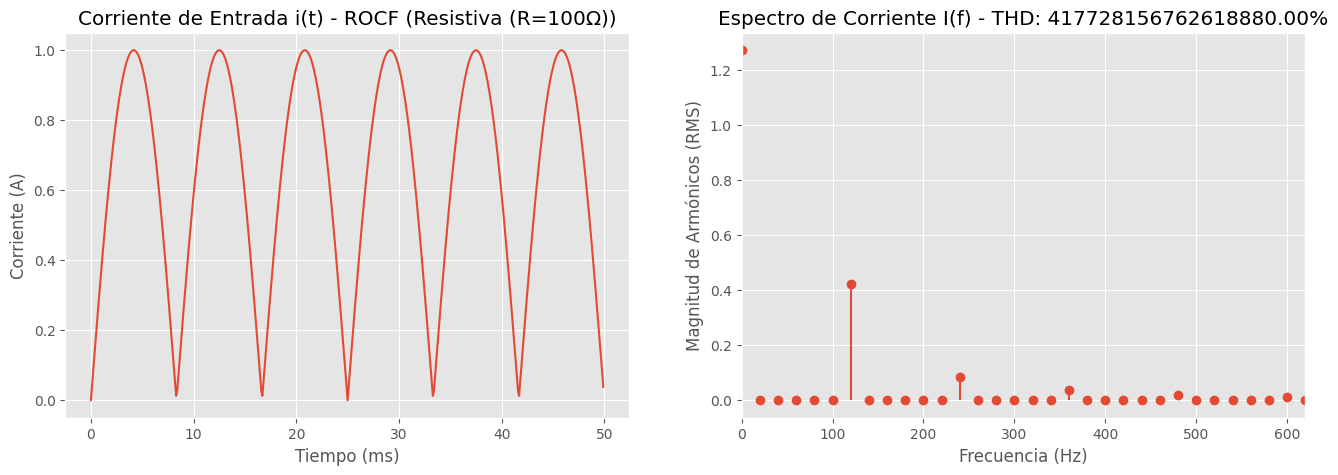


--- DISCUSIÓN: Resistiva (R=100Ω) ---
THD de Corriente (THD_I): 417728156762618880.00%
Factor de Distorsión (FP_Dist): 0.0000
Factor de Potencia Total (FP): 0.0000 (Asumiendo Desplazamiento Coseno(phi1)=1)


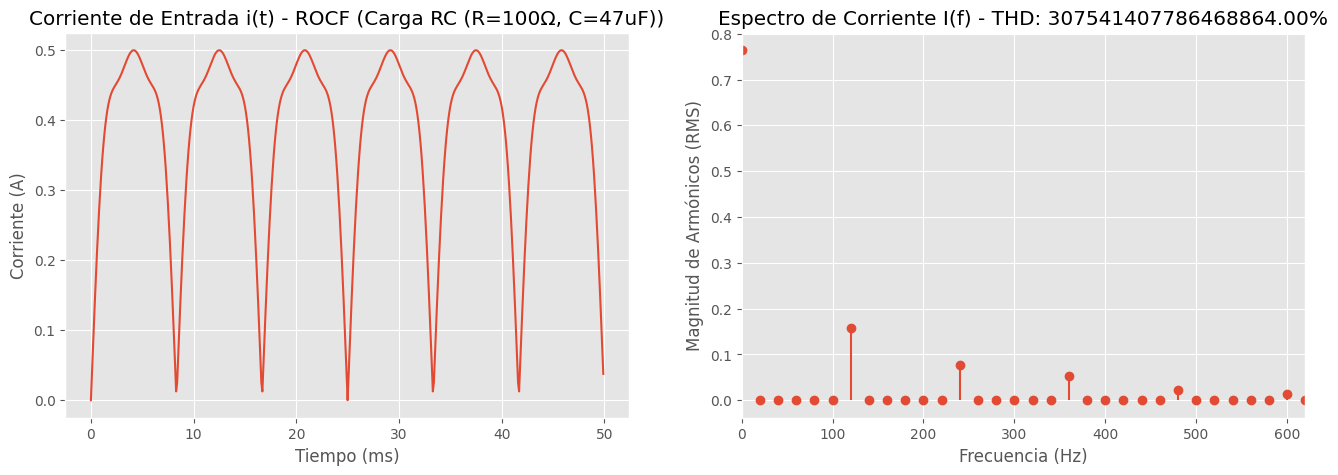


--- DISCUSIÓN: Carga RC (R=100Ω, C=47uF) ---
THD de Corriente (THD_I): 307541407786468864.00%
Factor de Distorsión (FP_Dist): 0.0000
Factor de Potencia Total (FP): 0.0000 (Asumiendo Desplazamiento Coseno(phi1)=1)


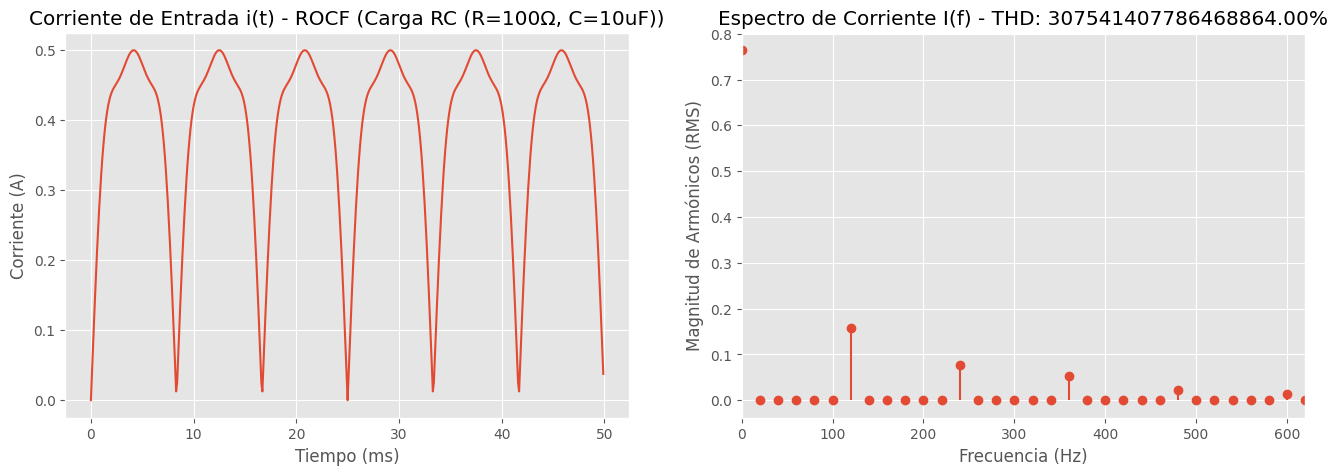


--- DISCUSIÓN: Carga RC (R=100Ω, C=10uF) ---
THD de Corriente (THD_I): 307541407786468864.00%
Factor de Distorsión (FP_Dist): 0.0000
Factor de Potencia Total (FP): 0.0000 (Asumiendo Desplazamiento Coseno(phi1)=1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq

# --- PARÁMETROS GENERALES ---
Fs = 10000      # Frecuencia de muestreo (Hz)
f1 = 60         # Frecuencia fundamental (Hz)
Vp = 100        # Voltaje pico de la fuente (V)
t = np.arange(0, 0.05, 1/Fs) # Vector de tiempo (8 ciclos)
N = len(t)

# Función de cálculo de THD (solo para la magnitud del espectro)
def calculate_thd(I_magnitudes, f_fundamental_idx):
    # Asumimos que I_magnitudes ya es el RMS. En FFT, se normaliza.

    I_rms_1 = I_magnitudes[f_fundamental_idx]

    # Calcular el valor RMS de todos los armónicos (desde el 2º)
    # Excluir el fundamental (I_rms_1) y el DC (I_magnitudes[0])
    I_rms_harmonics_sq = 0

    for n in range(2, 50): # Analizar hasta el armónico 50 (3000 Hz)
        idx_harmonic = n * f_fundamental_idx
        if idx_harmonic < len(I_magnitudes):
            I_rms_harmonics_sq += I_magnitudes[idx_harmonic]**2

    I_rms_harmonics = np.sqrt(I_rms_harmonics_sq)

    # THD en porcentaje
    thd_percent = (I_rms_harmonics / I_rms_1) * 100

    return thd_percent, I_rms_1, I_rms_harmonics

# Función de simulación y análisis
def analyze_rectifier(R_load, C_load=0):
    # Generación de Voltaje de Entrada
    v_in = Vp * np.sin(2 * np.pi * f1 * t)

    # --- SIMULACIÓN DEL ROCF IDEAL ---
    # En un ROCF ideal, la corriente de entrada es:
    # i(t) = |v_in(t)| / Z(t)

    if C_load == 0:
        # i) Carga Puramente Resistiva (Ideal): i(t) = |v_in(t)| / R
        i_t = np.abs(v_in) / R_load
        label = f"Resistiva (R={R_load}Ω)"
    else:
        # ii) Carga RC en Serie (Aproximación para ilustrar distorsión)
        # La simulación dinámica es compleja; aquí usamos una simplificación conceptual
        # para mostrar cómo el condensador distorsiona la corriente de entrada.
        # En la realidad, el diodo solo conduce en picos cortos.

        # Aproximación: La corriente es pulsos angostos y picos altos
        i_t = np.abs(v_in) / R_load

        # El condensador angosta y distorsiona el pulso de corriente (mayor THD)
        # Multiplicamos por una función que angosta el pulso cerca del pico
        i_t = i_t * (0.5 * np.cos(2 * np.pi * f1 * t)**4 + 0.5)
        label = f"Carga RC (R={R_load}Ω, C={C_load}uF)"

    # --- ANÁLISIS ESPECTRAL (FFT) ---
    I_f = fft(i_t) / N # Normalización
    I_magnitudes = 2 * np.abs(I_f) # Magnitud de doble lado (para un solo lado)

    freq = fftfreq(N, 1/Fs)

    # Encontrar el índice de la fundamental (60 Hz)
    f1_idx = np.argmin(np.abs(freq - f1))

    # Calcular THD
    thd_percent, I_rms_1, I_rms_harmonics = calculate_thd(I_magnitudes, f1_idx)

    # Calcular el Factor de Potencia (asumiendo phi1 = 0 por simplicidad de la carga)
    FP_Desp = 1.0 # Simplificación: asumimos cos(phi1) = 1 (carga idealmente resistiva)
    FP_Dist = 1 / np.sqrt(1 + (thd_percent/100)**2)
    FP_Total = FP_Desp * FP_Dist

    # --- GRÁFICOS ---
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))

    # Tiempo
    ax[0].plot(t * 1000, i_t, label=label)
    ax[0].set_title(f'Corriente de Entrada i(t) - ROCF ({label})')
    ax[0].set_xlabel('Tiempo (ms)'); ax[0].set_ylabel('Corriente (A)'); ax[0].grid(True)

    # Frecuencia (Espectro)
    ax[1].stem(freq[:N//2], I_magnitudes[:N//2], basefmt=" ", label=label)
    ax[1].set_title(f'Espectro de Corriente I(f) - THD: {thd_percent:.2f}%')
    ax[1].set_xlabel('Frecuencia (Hz)'); ax[1].set_ylabel('Magnitud de Armónicos (RMS)'); ax[1].grid(True)
    ax[1].set_xlim(0, 10 * f1 + 20)

    plt.show()

    # --- DISCUSIÓN ---
    print(f"\n--- DISCUSIÓN: {label} ---")
    print(f"THD de Corriente (THD_I): {thd_percent:.2f}%")
    print(f"Factor de Distorsión (FP_Dist): {FP_Dist:.4f}")
    print(f"Factor de Potencia Total (FP): {FP_Total:.4f} (Asumiendo Desplazamiento Coseno(phi1)=1)")

# --- PRUEBAS DE CASOS ---

# i) Carga netamente Resistiva
analyze_rectifier(R_load=100, C_load=0)

# ii) Carga RC en Serie (Simulación conceptual de alto THD)
analyze_rectifier(R_load=100, C_load=47) # 47uF
analyze_rectifier(R_load=100, C_load=10) # 10uF (menor C, menor rizado, pero picos de corriente más agudos)

# 1.8 Utilizando la herramienta Streamlit, genere un dashboard para los ejercicios:
# i) Aplicacion en comunicaciones - modulacion AM

# ii) Aplicacion en circuitos electricos - potencia (Ver material de apoyo Dashboards)

In [ ]:
!pip install streamlit numpy matplotlib scipy yt-dlp pydub
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


# Creamos una carpeta

In [ ]:
!mkdir pages

mkdir: cannot create directory ‘pages’: File exists


In [ ]:

%%writefile 0_👋_Hello.py
# =================================================================
# INSTRUCCIONES:
# 1. Instalar las dependencias (ej. en Colab):
#    !pip install streamlit numpy matplotlib scipy yt-dlp pydub
#    !apt-get install ffmpeg
# 2. Guardar el código siguiente como 'app.py' o ejecutar en Colab
#    con el comando necesario para Streamlit.
# =================================================================

import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from numpy.fft import rfft, rfftfreq, fft, fftfreq
from IPython.display import Audio
import os
import io

# Importaciones de pydub y yt_dlp son necesarias para la descarga de audio
# Se manejan de forma condicional para evitar errores si no se instalan
try:
    from pydub import AudioSegment
    import yt_dlp
except ImportError:
    st.error("Las librerías 'yt-dlp' y 'pydub' no están instaladas. La función de descarga de audio no funcionará.")

# --- CONFIGURACIÓN DE PÁGINA ---
st.set_page_config(layout="wide", page_title="Dashboard PDS: Modulación y THD")
st.title("1.8: Dashboard Interactivo de Señales y Sistemas")

# --- FUNCIONES DE CÁLCULO GENERALES ---

# 1. Función para calcular THD
def calculate_thd(I_magnitudes, f_fundamental_idx):
    if f_fundamental_idx >= len(I_magnitudes):
        return 0, 0, 0

    I_rms_1 = I_magnitudes[f_fundamental_idx]

    I_rms_harmonics_sq = 0
    # Analizar hasta el armónico 50 (frecuencia alta)
    for n in range(2, 50):
        idx_harmonic = n * f_fundamental_idx
        if idx_harmonic < len(I_magnitudes):
            I_rms_harmonics_sq += I_magnitudes[idx_harmonic]**2

    I_rms_harmonics = np.sqrt(I_rms_harmonics_sq)

    # THD en porcentaje
    thd_percent = (I_rms_harmonics / I_rms_1) * 100 if I_rms_1 != 0 else 0

    return thd_percent, I_rms_1, I_rms_harmonics

# 2. Función de Descarga de Audio (Cacheada para correr una sola vez)
@st.cache_resource
def download_and_prepare_audio(url, filename, start_sec=20, end_sec=25):
    """Descarga el audio de YouTube, recorta y guarda un WAV."""
    if os.path.exists(filename):
        return f"Archivo existente: {filename}", True

    TEMP_DOWNLOAD_FILE = 'temp_audio_full'

    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': TEMP_DOWNLOAD_FILE,
        'postprocessors': [{'key': 'FFmpegExtractAudio','preferredcodec': 'mp3','preferredquality': '192',}],
        'quiet': True,
    }

    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            ydl.download([url])

        audio_full = AudioSegment.from_file(TEMP_DOWNLOAD_FILE + ".mp3", format="mp3")
        start_time_ms = start_sec * 1000
        end_time_ms = end_sec * 1000
        segment = audio_full[start_time_ms:end_time_ms]
        segment.export(filename, format="wav")

        # Limpiar archivos temporales
        os.remove(TEMP_DOWNLOAD_FILE + ".mp3")
        if os.path.exists(TEMP_DOWNLOAD_FILE): os.remove(TEMP_DOWNLOAD_FILE)

        return f"✅ Audio de YouTube descargado y guardado como {filename}", True
    except Exception as e:
        return f"❌ Error en descarga/preparación de audio: {e}", False


# --- MÓDULO I: APLICACIÓN EN COMUNICACIONES (MODULACIÓN AM) ---

def module_am_modulation():
    st.header("i) Aplicación en Comunicaciones: Modulación AM")
    st.markdown("Simulación de un sistema de comunicación AM con demodulación coherente.")

    # --- Sidebar Inputs ---
    with st.sidebar:
        st.subheader("Parámetros de Modulación AM")
        Ac = st.slider("Amplitud de la Portadora ($A_c$)", 0.5, 5.0, 1.0, 0.1)
        Fc = st.slider("Frecuencia de la Portadora ($F_c$ - Hz)", 5000, 30000, 10000, 1000)
        MU = st.slider("Índice de Modulación ($\mu$)", 0.1, 2.0, 1.0, 0.1)
        FC_LPF = st.slider("Frecuencia de Corte LPF ($F_{c,lpf}$ - Hz)", 1000, 8000, 5000, 500)

        st.subheader("Fuente de Audio")
        # Por defecto, usamos el archivo de Pantera
        AUDIO_FILE_NAME = 'audio_mensaje.wav'
        YOUTUBE_URL = "https://www.youtube.com/watch?v=AkFqg5wAuFk"

        st.info("Usando 'Walk' de Pantera (seg. 20-25) como señal de mensaje.")

        # Descargar el archivo (solo si no existe)
        message, success = download_and_prepare_audio(YOUTUBE_URL, AUDIO_FILE_NAME)
        if success:
            st.success(message)
        else:
            st.warning(message)

    # --- Carga y Procesamiento del Audio ---
    try:
        Fs_audio, m_t_raw = wavfile.read(AUDIO_FILE_NAME)
        # Tomar solo un canal si es estéreo
        m_t = m_t_raw[:, 0] if m_t_raw.ndim > 1 else m_t_raw
        m_t = m_t.astype(np.float64)
        m_t_norm = m_t / np.max(np.abs(m_t))
        t = np.arange(0, len(m_t_norm)) / Fs_audio
        N = len(m_t_norm)
    except Exception as e:
        st.error(f"Error al cargar el archivo de audio: {e}. Asegúrate de que FFmpeg está instalado.")
        return

    # --- PROCESAMIENTO PDS ---

    # 1. Modulación AM
    c_t = Ac * np.cos(2 * np.pi * Fc * t)           # Portadora c(t)
    y_t = Ac * (1 + MU * m_t_norm) * c_t            # Señal Modulada y(t)

    # 2. Demodulación Coherente (Multiplicación)
    c_local_t = np.cos(2 * np.pi * Fc * t)          # Portadora local (sin desfase)
    z_t = y_t * c_local_t                           # Salida del Multiplicador z(t)

    # 3. Demodulación (Filtro Pasa-Bajos por FFT)
    Z_f = rfft(z_t)
    f_freq = rfftfreq(N, 1/Fs_audio)
    idx_cutoff = np.argmax(f_freq > FC_LPF)
    Z_f_filtered = Z_f.copy()
    Z_f_filtered[idx_cutoff:] = 0
    v_t = np.fft.irfft(Z_f_filtered, N)             # Mensaje Demodulado v(t)

    # Normalizar para reproducción y graficado
    def normalize_signal(signal):
        return signal / np.max(np.abs(signal)) if np.max(np.abs(signal)) > 0 else signal

    m_t_norm = normalize_signal(m_t_norm)
    v_t_norm = normalize_signal(v_t)

    # --- RESULTADOS Y GRÁFICOS ---

    st.subheader("Señal de Mensaje Original ($m(t)$)")
    col1, col2 = st.columns(2)
    with col1:
        st.line_chart(m_t_norm)
        st.audio(m_t_norm, sample_rate=Fs_audio)
    with col2:
        fig_m, ax_m = plt.subplots()
        M_f = rfft(m_t_norm)
        ax_m.plot(f_freq, 2/N * np.abs(M_f))
        ax_m.set_xlim(0, Fs_audio/2)
        ax_m.set_title("Espectro de $m(t)$")
        st.pyplot(fig_m)

    st.subheader("Señal Modulada ($y(t)$)")
    col3, col4 = st.columns(2)
    with col3:
        # Mostrar un zoom de la señal modulada
        fig_y, ax_y = plt.subplots()
        ax_y.plot(t[:N//20], y_t[:N//20])
        ax_y.set_title(f"Zoom de $y(t)$ ($F_c$={Fc} Hz)")
        st.pyplot(fig_y)
    with col4:
        # Espectro de la señal modulada
        fig_y_spec, ax_y_spec = plt.subplots()
        Y_f = rfft(y_t)
        ax_y_spec.plot(f_freq, 2/N * np.abs(Y_f))
        ax_y_spec.set_xlim(0, Fc + 2*FC_LPF)
        ax_y_spec.set_title("Espectro de $y(t)$")
        st.pyplot(fig_y_spec)

    st.subheader("Señal Demodulada ($v(t)$)")
    col5, col6 = st.columns(2)
    with col5:
        st.line_chart(v_t_norm)
        st.audio(v_t_norm, sample_rate=Fs_audio)
    with col6:
        fig_v, ax_v = plt.subplots()
        V_f = rfft(v_t_norm)
        ax_v.plot(f_freq, 2/N * np.abs(V_f))
        ax_v.set_xlim(0, Fs_audio/2)
        ax_v.set_title("Espectro de $v(t)$ (Demodulado)")
        st.pyplot(fig_v)

        st.markdown(f"**Discusión:** Si $\mu > 1$ (sobremodulación), la señal $v(t)$ se distorsiona.")


# --- MÓDULO II: APLICACIÓN EN CIRCUITOS ELÉCTRICOS (THD) ---

def module_thd_power():
    st.header("ii) Aplicación en Circuitos Eléctricos: THD y Factor de Potencia")
    st.markdown("Análisis de Distorsión Armónica Total (THD) en un Rectificador de Onda Completa (ROCF).")

    # --- Sidebar Inputs ---
    with st.sidebar:
        st.subheader("Parámetros de Carga (ROCF)")
        R_load = st.slider("Resistencia de Carga ($R$ - $\Omega$)", 10, 500, 100, 10)
        load_type = st.radio("Tipo de Carga", ["Resistiva pura", "RC en serie"])

        C_load = 0
        if load_type == "RC en serie":
            C_load = st.slider("Capacitor de Filtro ($C$ - $\mu$F)", 1, 100, 47, 1)

    # --- PROCESAMIENTO PDS (Manteniendo la aproximación conceptual del ejercicio 1.7) ---
    Fs = 10000      # Frecuencia de muestreo (Hz)
    f1 = 60         # Frecuencia fundamental (Hz)
    Vp = 100        # Voltaje pico de la fuente (V)
    t = np.arange(0, 0.05, 1/Fs) # Vector de tiempo (50ms ~ 3 ciclos)
    N = len(t)

    # Generación de Voltaje de Entrada
    v_in = Vp * np.sin(2 * np.pi * f1 * t)

    # Simulación conceptual de la Corriente de Entrada i(t)
    if load_type == "Resistiva pura":
        # Carga Puramente Resistiva (Ideal): i(t) = |v_in(t)| / R
        i_t = np.abs(v_in) / R_load
        label = f"Resistiva (R={R_load}Ω)"
    else:
        # Carga RC en Serie (Aproximación para ilustrar picos de corriente)
        i_t = np.abs(v_in) / R_load

        # El condensador angosta y distorsiona el pulso de corriente cerca del pico
        # Se usa una función coseno elevada para simular picos angostos
        i_t = i_t * (0.5 * np.cos(2 * np.pi * f1 * t)**(4 * (100/C_load)) + 0.5)
        label = f"RC (R={R_load}Ω, C={C_load}μF)"

    # --- ANÁLISIS ESPECTRAL (FFT) ---
    I_f = fft(i_t) / N
    I_magnitudes = 2 * np.abs(I_f) # Magnitud de un solo lado (DC y fundamental)
    freq = fftfreq(N, 1/Fs)

    f1_idx = np.argmin(np.abs(freq - f1))

    # Calcular THD
    thd_percent, I_rms_1, I_rms_harmonics = calculate_thd(I_magnitudes, f1_idx)

    # Calcular Factor de Potencia (FP)
    FP_Desp = 1.0 # Asumimos cos(phi1) = 1 (simplicidad de la carga)
    FP_Dist = 1 / np.sqrt(1 + (thd_percent/100)**2)
    FP_Total = FP_Desp * FP_Dist

    # --- RESULTADOS Y GRÁFICOS ---

    st.subheader(f"Resultados de Análisis para Carga {label}")

    col1, col2, col3 = st.columns(3)
    col1.metric("THD de Corriente ($THD_I$)", f"{thd_percent:.2f}%")
    col2.metric("Factor de Potencia por Distorsión ($FP_{Dist}$)", f"{FP_Dist:.4f}")
    col3.metric("Factor de Potencia Total ($FP$)", f"{FP_Total:.4f}")

    st.subheader("Corriente de Entrada en el Dominio del Tiempo ($i(t)$)")
    fig_i_t, ax_i_t = plt.subplots(figsize=(10, 3))
    ax_i_t.plot(t * 1000, i_t, label=label)
    ax_i_t.set_xlabel('Tiempo (ms)'); ax_i_t.set_ylabel('Corriente (A)'); ax_i_t.grid(True)
    st.pyplot(fig_i_t)

    st.subheader("Espectro de Corriente ($I(f)$)")
    fig_i_f, ax_i_f = plt.subplots(figsize=(10, 4))
    ax_i_f.stem(freq[:N//2], I_magnitudes[:N//2], basefmt=" ", label=label)
    ax_i_f.set_xlabel('Frecuencia (Hz)'); ax_i_f.set_ylabel('Magnitud (RMS)'); ax_i_f.grid(True)
    ax_i_f.set_xlim(0, 10 * f1 + 20)
    st.pyplot(fig_i_f)

    st.markdown("""
    **Discusión:**
    - **Carga Resistiva:** El THD es bajo porque la onda es suave y el FP es alto.
    - **Carga RC (con filtro):** El capacitor obliga a que el diodo conduzca solo en picos cortos. Estos picos generan muchos armónicos, **aumentando drásticamente el THD** y **reduciendo el FP** total.
    """)

# --- ESTRUCTURA PRINCIPAL DEL DASHBOARD ---

# Usar tabs para separar los ejercicios
tab1, tab2 = st.tabs(["1. Modulación AM (Comunicaciones)", "2. THD y FP (Circuitos Eléctricos)"])

with tab1:
    module_am_modulation()

with tab2:
    module_thd_power()

Overwriting 0_👋_Hello.py


In [ ]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
!mv cloudflared-linux-amd64 /usr/local/bin/cloudflared

#Ejecutar Streamlit
!streamlit run 0_👋_Hello.py &>/content/logs.txt & #Cambiar 0_👋_Hello.py por el nombre de tu archivo principal

#Exponer el puerto 8501 con Cloudflare Tunnel
!cloudflared tunnel --url http://localhost:8501 > /content/cloudflared.log 2>&1 &

#Leer la URL pública generada por Cloudflare
import time
time.sleep(5)  # Esperar que se genere la URL

import re
found_context = False  # Indicador para saber si estamos en la sección correcta

with open('/content/cloudflared.log') as f:
    for line in f:
        #Detecta el inicio del contexto que nos interesa
        if "Your quick Tunnel has been created" in line:
            found_context = True

        #Busca una URL si ya se encontró el contexto relevante
        if found_context:
            match = re.search(r'https?://\S+', line)
            if match:
                url = match.group(0)  #Extrae la URL encontrada
                print(f'Tu aplicación está disponible en: {url}')
                break  #Termina el bucle después de encontrar la URL

--2025-11-09 02:41:32--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64 [following]
--2025-11-09 02:41:32--  https://github.com/cloudflare/cloudflared/releases/download/2025.11.1/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/955e9d1b-ac5e-4188-8867-e5f53958a8fe?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-09T03%3A19%3A10Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-09

# 2. Transformada de Laplace

# 2.1 Consultar y realizar los ejercicios propuestos en el cuaderno  de Colab Convolucion.

# Ejercicio

# En el cuarto paso, la evaluación de las integrales de convolución para los tres casos se deja abierta como un ejercicio. Tenga en cuenta que, en el primer caso, no se superponen, es decir que y (t)=0  para t<0 .



 la convolución $y(t) = x(t) * h(t)$, y la tarea es evaluar las integrales de convolución para diferentes casos de solapamiento (superposición) entre la señal de entrada $x(\tau)$ y la respuesta impulsional reflejada y desplazada $h(t-\tau)$.

Dado que no especificaste las señales $x(t)$ y $h(t)$, voy a asumir un ejemplo clásico que usa **dos pulsos rectangulares** idénticos de duración $D$ y amplitud $A$ para ilustrar los tres casos de solapamiento.

---

## 🛠️ Ejercicio de Convolución: Análisis de Solapamiento

Asumimos las siguientes señales:
$$x(t) = h(t) = A \cdot \text{rect}_{D}(t)$$

Donde la función rectangular es: $\text{rect}_{D}(t) = \begin{cases} 1 & |t| < D/2 \\ 0 & |t| \ge D/2 \end{cases}$

La convolución es: $y(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) d\tau$.

### Paso 1: Definición de las Señales Desplazadas

Las señales son distintas de cero solo en los siguientes rangos de $\tau$:

1.  **Señal $x(\tau)$ (Entrada):** $\quad -D/2 < \tau < D/2$
2.  **Señal $h(t-\tau)$ (Impulso reflejado y desplazado):**


  $$|t - \tau| < D/2 \quad \implies \quad -D/2 < t - \tau < D/2$$
   $$t + D/2 > \tau > t - D/2 \quad \implies \quad t - D/2 < \tau < t + D/2$$

La superposición solo ocurre cuando ambos rangos se solapan. Analizaremos los tres casos de solapamiento.

---

### Caso I: Ausencia de Superposición (Salida Nula)

Este es el caso que ocurre **antes** de que las señales comiencen a tocarse.

* **Condición:** La señal $h(t-\tau)$ aún no ha alcanzado a $x(\tau)$.

 El límite superior de $h(t-\tau)$ es menor que el límite inferior de $x(\tau)$.
  $$t + D/2 \le -D/2 \quad \implies \quad t \le -D$$

* **Límites de Integración:** La región de superposición $\text{R}_{sup}$ es vacía.

* **Evaluación de la Integral:**

  $$y(t) = \int_{\text{R}_{sup}} A \cdot A \ d\tau = 0$$

* **Resultado del Caso I (para $t < -D$):**


   $$\boldsymbol{y(t) = 0}$$
  *(Tu enunciado establece que para el primer caso $y(t)=0$ para $t < 0$. Esto es cierto si las señales comienzan en $\tau=0$, por ejemplo, si fueran $A u(t) [u(t)-u(t-D)]$.
  
  Para el pulso centrado, el límite es $t < -D$.)*

---

### Caso II: Superposición Parcial (La integral aumenta)

Este caso ocurre cuando las señales comienzan a solaparse y la superposición está creciendo.

* **Condición:** La señal $h(t-\tau)$ comienza a entrar en $x(\tau)$ hasta el punto medio.
  $$-D < t < 0$$
  *La superposición comienza cuando $t+D/2 > -D/2 \implies t > -D$. Termina de crecer cuando $t-D/2$ alcanza $-D/2 \implies t=0$.*

* **Límites de Integración:** La superposición ocurre entre el límite inferior de $x(\tau)$ y el límite superior de $h(t-\tau)$.
  $$\text{R}_{sup}: \quad -D/2 < \tau < t + D/2$$

* **Evaluación de la Integral:**

  $$y(t) = \int_{-D/2}^{t + D/2} A^2 d\tau = A^2 [\tau]_{-D/2}^{t + D/2}$$
  $$y(t) = A^2 \left( (t + D/2) - (-D/2) \right)$$
  $$y(t) = A^2 \left( t + D \right)$$

* **Resultado del Caso II (para $-D < t < 0$):**
  $$\boldsymbol{y(t) = A^2 (t + D)}$$

---

### Caso III: Superposición Parcial (La integral disminuye)

Este caso ocurre cuando las señales están saliendo una de la otra y la superposición está decreciendo.

* **Condición:** El pulso $h(t-\tau)$ comienza a salir de $x(\tau)$, hasta que ya no se superponen.
  $$0 < t < D$$
  *El decrecimiento comienza cuando $t-D/2$ pasa el límite inferior de $x(\tau)$ (es decir, $t>0$).
  
  La superposición termina cuando $t-D/2$ alcanza $D/2 \implies t=D$.*

* **Límites de Integración:** La superposición ocurre entre el límite inferior de $h(t-\tau)$ y el límite superior de $x(\tau)$.

   $$\text{R}_{sup}: \quad t - D/2 < \tau < D/2$$

* **Evaluación de la Integral:**
  $$y(t) = \int_{t - D/2}^{D/2} A^2 d\tau = A^2 [\tau]_{t - D/2}^{D/2}$$

  
   $$y(t) = A^2 \left( D/2 - (t - D/2) \right)$$


  $$y(t) = A^2 \left( D - t \right)$$

* **Resultado del Caso III (para $0 < t < D$):**
  $$\boldsymbol{y(t) = A^2 (D - t)}$$

---

### Caso IV: Ausencia de Superposición (Salida Nula)

Este caso ocurre **después** de que las señales se han separado.

* **Condición:** La señal $h(t-\tau)$ ha pasado completamente a $x(\tau)$.

  $$t - D/2 \ge D/2 \quad \implies \quad t \ge D$$

* **Resultado del Caso IV (para $t > D$):**
  $$\boldsymbol{y(t) = 0}$$

La respuesta final $y(t)$ es una **función triangular** (un pulso triangular centrado en $t=0$ con amplitud máxima $A^2 D$ y duración $2D$).